## Stock Price prediction using Time Series
#### Stock name: Britannia industries
#### Data:2012-10-01 to 2020-09-29
#### Source of the data: https://in.finance.yahoo.com/quote/BRITANNIA.NS/history?period1=1348963200&period2=1601424000&interval=1d&filter=history&frequency=1d
#### Problem Statement: To predict closing price of Britannia stock.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [3]:
time = pd.read_csv('BRITANNIA_NS.csv',
                   parse_dates=['Date'], index_col='Date',
                   date_parser=dateparse)
time.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-01,239.824997,241.500000,237.500000,238.500000,204.932968,224146.0
2012-10-03,240.000000,240.000000,235.300003,236.475006,203.192963,209378.0
2012-10-04,237.975006,240.725006,236.625000,238.850006,205.233719,124618.0
2012-10-05,241.500000,249.000000,240.024994,243.125000,208.907043,616948.0
2012-10-08,244.500000,248.000000,243.000000,246.149994,211.506287,468618.0


In [4]:
time.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-23,3618.899902,3652.899902,3562.800049,3624.899902,3624.899902,405856.0
2020-09-24,3590.000000,3655.000000,3560.199951,3612.750000,3612.750000,517285.0
2020-09-25,3640.000000,3716.949951,3615.000000,3686.399902,3686.399902,507358.0
2020-09-28,3710.899902,3778.000000,3689.000000,3737.350098,3737.350098,390640.0
2020-09-29,3769.000000,3796.000000,3701.649902,3736.850098,3736.850098,449320.0


In [5]:
time.shape

(1970, 6)

# Missing Value

In [6]:
time.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [7]:
time=time.bfill()

In [8]:
time.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
time.shape

(1970, 6)

In [10]:
time1 = time['Close']
time1.head()

Date
2012-10-01    238.500000
2012-10-03    236.475006
2012-10-04    238.850006
2012-10-05    243.125000
2012-10-08    246.149994
Name: Close, dtype: float64

In [11]:
time1.tail()

Date
2020-09-23    3624.899902
2020-09-24    3612.750000
2020-09-25    3686.399902
2020-09-28    3737.350098
2020-09-29    3736.850098
Name: Close, dtype: float64

In [12]:
time1.shape

(1970,)

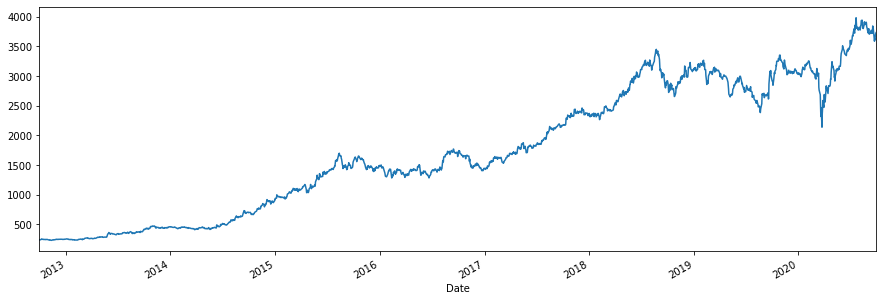

In [13]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

# Split

In [15]:
time1.shape[0]*0.8

1576.0

In [16]:
train=time1[0:1576] 
test=time1[1576:]

In [17]:
train.head()

Date
2012-10-01    238.500000
2012-10-03    236.475006
2012-10-04    238.850006
2012-10-05    243.125000
2012-10-08    246.149994
Name: Close, dtype: float64

In [18]:
train.count()

1576

In [19]:
test.head()

Date
2019-02-21    3001.600098
2019-02-22    3012.800049
2019-02-25    3048.199951
2019-02-26    3073.500000
2019-02-27    3058.600098
Name: Close, dtype: float64

In [20]:
test.count()

394

In [21]:
#train.tail()

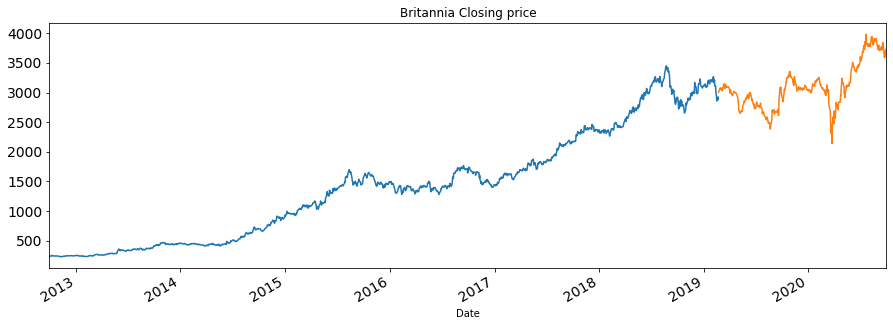

In [22]:
train.plot(figsize=(15,5), title= 'Britannia Closing price', fontsize=14)
test.plot(figsize=(15,5), title= 'Britannia Closing price', fontsize=14)
plt.sdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA30AAAFGCAYAAADeqPb+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdeXRV1fn/8feTeSAhQMI8yaTIJAgiijNonau2VotW/bVqtWqr1lZr6xdbW22t1trSOrVqHapttQ44Qp0ZVFAEFETmKSQkhJB53L8/zrm5NzfTBZJcknxea911ztl7n3P2DejKwx4ec84hIiIiIiIinVNMtDsgIiIiIiIibUdBn4iIiIiISCemoE9ERERERKQTU9AnIiIiIiLSiSnoExERERER6cQU9ImIiIiIiHRiCvpERKRdmdkDZvaLKL37NTO7pI2e/ZiZ3bGfz4jazyacmf3MzB6Jdj9ERGT/mfL0iYjIvjKzjUAfoAaoAhYC33fObYnw/uOBJ51zA9uqj63FzAy4FrgCOAgoABYBv3TOrTCzx4CtzrmfR6+XIiIiDWmkT0RE9teZzrluQD8gB/hTUw3NLLbdetX6/gj8ELgO6AmMAl4ATo9mp9qCmcVFuw8iItJ6FPSJiEircM6VA/8BDg2U+VMe/2pmr5pZCXBCYBqkmaUCrwH9zazY//Q3syPMbJGZ7TazbDP7s5klhDzTmdn3zewrMyswszn+KBxmdqmZfWBmv/frNpjZqSH3vmNm3/PPh5vZW2aWb2Z5ZvaUmWU09t3MbCTwA+BC59xbzrkK51ypc+4p59xdTdxzuZmtNbNdZvaSmfX3y83M/mBmuWZWaGbLzWxsyM/rDv/8eDPbamY3+m2zzeyykOf3MrOXzWyPmX3s/0w/aKIvQ/2f2xVmtt1/1o0h9bPN7D9m9qSZ7QEu9cueDGkz3cwW+n8uW8zsUr880f95bzazHH+KanJj/RARkehQ0CciIq3CzFKAbwGLw6q+DfwaSAPqghLnXAlwKrDdOdfN/2zHmyp6PZAJTANOAq4Oe+YZwBRgAnA+cEpI3VTgS//+3wF/CwSF4V0G7gT6A6OBQcDsJr7eSXhTNz9qor7+g81O9J99Pt4I6CbgGb/6ZOBYvJHCDLyfWX4Tj+oLdAcGAN8F5phZD79uDlDit7nE/7TkBGCk34ebzWxGSN3ZeEF7BvBU2PcZjBeg/wnIAg4DlvnVv/W/y2HACL+vt0XQFxERaScK+kREZH+9YGa7gT3ATODusPoXnXMLnHO1/mhgs5xzS51zi51z1c65jcCDwHFhze5yzu12zm0G3sYLOAI2Oeceds7VAI/jBV19GnnPWufcPH/UbidwbyPvCegFZLfU9xCzgL875z5xzlUAtwDTzGwo3trHNOAQvLX1q5xzTT27Cm/NYJVz7lWgGDjYnyZ7HvB//ojjF/53bcntzrkS59wK4FHgwpC6Rc65F/w/p7JGvs9859w//b7kO+eW+cH05cD1zrldzrki4DfABRH0RURE2omCPhER2V9fd85lAInANcC7ZtY3pD6iTV0CzGyUmc01sx3+VMPf4I3ahdoRcl4KdGuszjlX6p+G1gfe09vMnjGzbf57nmzkPQH5eMFjpPrjje4F+lHsP2OAc+4t4M94I3U5ZvaQmaU39V7nXHXIdeC7ZgFx1P/ZRvJzDm2zye9nJPcPAtY1Up4FpABL/Wmfu4HX/XIRETlAKOgTEZFW4Zyrcc49jzc9c3poVXO3NVL2V2A1MNI5lw78DG8qZmu703//eP89FzXznv8BA81scoTP3g4MCVz46xd7AdsAnHP3O+cOB8bgTY28aS/7vhOoBkJ3PR0UwX2hbQb7/Qxo7s9pCzC8kfI8oAwY45zL8D/d/Y19RETkAKGgT0REWoW/QcnZQA9gVYS35QC9zKx7SFka3lTRYjM7BLiqdXta7z3FwG4zG0AzgZdz7ivgL8A//Q1WEswsycwuMLObG7nlaeAyMzvMzBLxRis/dM5tNLMpZjbVzOLx1uSV4wXKEfOnrj4PzDazFP/n9J0Ibv2F334McBnwbISvfAqYYWbnm1mcv4nMYc65WuBh4A9m1hvAzAaY2SnNPk1ERNqVgj4REdlfL5tZMV6g9mvgEufc55Hc6JxbDfwTWO9PD+wP/Bhv85civIAi0sBkb90OTAIKgVfwgqjmXEdwWuZuvOmO5wAvhzd0zv0P+AXwHN5awOEE17ml432vArwplvnA7/eh/9fgbfKyA3gC7+dY0cI97wJr8UYuf++cezOSF/lrJ08DbgR24W3iMsGv/qn/zMX+NNn5wMF79U1ERKRNKTm7iIhIJ2BmvwX6Ouca7OLpbyCzAYgPWyMoIiJdgEb6REREOiAzO8TMxvvTao/AS+nw32j3S0REDjxx0e6AiIiI7JM0vCmd/YFc4B7gxaj2SEREDkia3ikiIiIiItKJaXqniIiIiIhIJ6agT0REREREpBPrFGv6MjMz3dChQ6PdDRERERERkahYunRpnnMuq7G6ThH0DR06lCVLlkS7GyIiIiIiIlFhZpuaqtP0ThERERERkU5MQZ+IiIiIiEgnpqBPRERERESkE1PQJyIiIiIi0ontddBnZj8zM2dmfw4pMzObbWbbzazMzN4xszFh9/UwsyfMrND/PGFmGWFtxpnZu/4ztpnZbWZm+/71REREREREura9CvrM7EjgcmB5WNVPgBuBa4EpQC4wz8zSQto8DUwCTgW+5p8/EfLsdGAekOM/4zrgJuCGvemjiIiIiIiIBEUc9JlZd+Ap4LtAQUi5AT8C7nLOPeecWwlcAqQB3/bbjMYL9K5wzi10zi0CrgTOMLOD/UfNAlKAS5xzK51zzwG/BW7QaJ+IiIiIiMi+2ZuRvoeA/zjn3gorPwjoC7wZKHDOlQHvAUf5RdOAYmBhyH0LgJKwNu/79wa8AfQHhu5FP0VERERERMQXUdBnZpcDI4BfNFLd1z/mhJXnhNT1BXY651yg0j/PDWvT2DNC3xHapyvMbImZLdm5c2ckX0NERERERCT6dn4Jmxa23K6VtBj0+dMvfwPMcs5VNtPUhV1bWFl4fSRtrIlynHMPOecmO+cmZ2VlNdMtERERERGRA8icI+DRU9vtdZGM9E0DMoGVZlZtZtXAccDV/nm+3y58NK43wZG6HUDv0LV5/nlWWJvGngENRwBFREREREQ6l9oaqG5unG3fRBL0vQCMAw4L+SwBnvHP1+AFbDMDN5hZEnAMwTV8i4BueAFkwDQgNazNMf69ATOB7cDGvfhOIiIiIiIiHUvuKvh1P3js9FZ/dItBn3Nut7+bZt0HbwOWXf61A+4Dbjazc81sLPAY3sYtT/vPWAW8DjxoZkea2TTgQWCuc+5L/1VPA6XAY2Y21szOBW4G7g1dCygiIiIiItIpVFcEz5f/C2oqYOtHXvmquVBbCzVV+/2auP1+gud3QDIwB+gBfAic7JwrCmkzC7if4C6fLwHXBCqdc4VmNtN/xhK8tBD3APe2Uh9FRERERESiK3Q8q6IY4hK98/LCYPlbv4KFf4K0/pCYBlcvgpjYfX7lPgV9zrnjw64dMNv/NHXPLuCiFp67Ajh2X/okIiIiIiJywKsKyVBXsQdSe3nnoUHf9mXesWg7FAE7V0OfMfv8yr3J0yciIiIiIiL7o2xX8LwiZGJkaNAXWg5Quov9oaBPRERERESkvTx9QfA8ENw5B/lrg+W5X3jHw2Z5x7JGgr6da6CqPKJXKugTERERERFpLzkrgue71nnH3ZuhYAOM+6Z3XVMJR1wJJ9zqXZcV1H9GdQXMmQL/+k5Er1TQJyIiIiIiEg0vXQsL/gh/HO9dDzk6WDdwMqT0gtgEyPmi/n0Vxd7xqzcieo2CPhERERERkfawc03Dsnm3Bc8HTgmeDzgc4pNg2Amw/m1Y9Bco2OjVVZUE20WQ3U5Bn4iIiIiISHuYExLUzZjdsD7rELjgaTj8Uug5zCsbNAXy1sAbt8Az/hq/ytLgPeFTPxuhoE9ERERERKSthY/ITb8eDjqufllsHBxyOpz5RzDzygYcHqwv3QWfPQt/mRosK85t8dWtlZxdREREREREmrJrffD82Ju844X/hNzVkDWq6Z04+08KnsclwML769cX50DvQ5p9tYI+ERERERGRtrb90+B5YCOWhFQY6I/kJaY1fl9yRvC8siS4ri+gOBcWP9DsqzW9U0REREREpK3lfB48byrAa0q/w7xjyc6GdSW58Mk/mr1dQZ+IiIiIiEhbK86B9AFw6asw/Ud7d+//ex2mXeOdjzsfjv0JnPVnL53D9k8h9/Nmb9f0ThERERERkbZUkg/LnvLOhx7dfNvGxCfDMTfC8BNgxIxg+Tt3wYp/t3i7RvpERERERETa0uqXvWNc8r4/I6Vn/YAPoFvviG5V0CciIiIiItKWinK84zUft+5zu/XxjgnNrxFU0CciIiIiItKWSnIhuQdkDGrd53bL8o4JKc02U9AnIiIiIiLSlop2BEflWlNiuncszmm2mYI+ERERERGRtvD5CzC7O2xaAJkjW//51X5Cd2s+rFPQJyIiIiIi0hY+fNA7lhVA1ujWf37GYO94wdPNNmsx6DOzH5jZcjPb438WmdnpIfWPmZkL+ywOe0aimf3JzPLMrMTMXjKzgWFtBpvZy359npndb2YJe/GVRUREREREDhxxIeFM70Na//lH/gBm/QdGfa3ZZpGM9G0FfgpMAiYDbwEvmNn4kDbzgX4hn9PCnnEfcB5wIXAMkA7MNbNYAP/4CpDm118IfAO4J4L+iYiIiIiIHHhiE4PnbTHSFxsHI2eCWbPNWkzO7px7MazoVjO7CpgGLPfLKpxzOxq738y6A98FLnPOzfPLLgY2ATOAN4CTgTHAEOfcFr/NT4BHzOxW59yelvopIiIiIiJyQElKD573GhG1buzVmj4zizWzC4BuwMKQqulmlmtma8zsYTMLzRJ4OBAPvBko8AO7VcBRftE0YFUg4PO9AST694uIiIiIiBx4Vj4PFcWN1wU2Wrn4v/WneraziII+MxtnZsVABfAAcI5zboVf/TrwHeAk4EbgCOAtMwuMZfYFaoC8sMfm+HWBNuH7jOb59/VFRERERETkQLP9U/jPZfDaTxqvz/4MRp8Fw09s336FaXF6p+9L4DAgA29t3uNmdrxzbqVz7pmQdivMbCne1M3TgeebeaYBLuTaNdGu0XIzuwK4AmDw4MERfQkREREREZFWU17oHQs2Nqzbkw27N8PU77drlxoT0Uifc67SObfWObfEOXcLsAy4vom22/E2fwkkotgBxAKZYU17Exzd20HDEb1M/75GMw065x5yzk12zk3OysqK5GuIiIiIiIi0nsC0zk0LoLY2WL7lY7jX361z0JHt368w+5qnLwZvvV0DZpYJDACy/aKlQBUwM6TNQGA0wXWBi4DRYWkcZuJNJ126j30UERERkSh5feUOzn9gEVU1tS03FumoSnKD55v90KaqHF6+LljebzzR1uL0TjO7Cy+dwha8lArfBo4HTjezbsBs4Dm8IG8ocCeQC/wXwDlXaGZ/A+42s1wgH7gXb+fP+f5r3gQ+B/5hZjcCvYC7gYe1c6eIiIhIx+Kc4/tPev9u//HGXUwc1IPkhNgo90qkDWz+MHj+6VMwdDq8+1vI/cIru+h5iI2PTt9CRDLS1xd4Em9d3/+AKcCpzrnX8DZaGQe8CKwBHvfbTXPOFYU843q89X3PAguAYuBM51wNgH88HSj165/12/94P7+fiIiIiLSzwrKquvNvP/whP39hZRR7I9JGnIP178DY82DSJfDFC1BZ6k31BEjNghEnRbWLAZHk6bu0mboy4JQInlEOXOt/mmqzGTijpWeJiIiIyIEtu7C83vWnWwqi1BORNrRzNRTvgGHHQ0I3+ORx2LEctn0Cg4+Ccx6Idg/rRLp7p4iIiIhIRLYVlNW7HpHVLUo9EWlD69/xjsNOgOLcYFltFUycBT2GRKtnDezrRi4iIiIiIo36fPsezODRy6bQNz2JN7/IYf4XjW7ILp1FSb43tbEryV0FKZmQMQiyRkFyD3jnTq+u57Do9i2Mgj4RERERaVXLt+5meFY3Tji4d93unf/8aHOUeyVtpmAj3D0MHjg62j1pXyV50K2Pd56YBrOeC9alhGeriy4FfSIiIiLSapxzfLa1kPEDuwPwyCWTAYiJsWh2S9rSzi+946710e1HeyvJhdSQ4G7g4XDle3Do16HH0Kh1qzEK+kRERESk1eTsqSCvuILxA7ygb+LgHpx8aB/W7yyOcs+kzRRuDZ5XlTXdrrMpzYeUXvXL+k2A8x+HuITo9KkJCvpEREREpNXs2OPt3Dm4V0pd2ag+aWzML6WiuiZa3ZK2UrQDXrkheF26K3p9aW+VJd60zg5AQZ+IiIiI7LO1ucX1grndpZUAdE8OjnSM7NONmlrHxrwuttFHV7DsqfrX+Wu9o3OwJ7v9+9OeKku8VA0dgII+EREREYnIayuyGft/b5BfXAFAeVUNM+59l+v++Wldm92lXmL2jJT4urKstEQAdpVUtmNv992CtXlM+tU8lm5SfsFmVZV7u3aG+tfFXsC34t9w7yGw5eO2ebdzsPZ/UL6nbZ7fktpaP+hLjc7795KCPhERERFpkXOOq576hOKKar7K9dbnFVdUA/DG58F0DLlF3vTOjORg0Nct0UsNXeK3P5DV1DpmPfIhu0oqWZUdpYCiI6iphjlHwOI53vXVi2HcN6G8EFa/Alv9YG/Lh23z/vVvw5PnwgPT2+b5GxcE8/A1proMcB0m6FNydhERERFp0YpthXXnm/NLueChxfRNT6rXprqmlscXbuLQfun0TA1O70wNBH2V7R/0vb5yB19k7+GGmaNabFtdU0uBP1IJUFFd25Zd69hKdsLuTd7GJdOvh96j4esPwPZl8PotMOxYr1357rZ5/+K/esfdm6CmCmLjm2+/tx47zTvOLmy8vrLEO3aQoE8jfSIiIiLSog15JXXnTyzeBAQ3bQEoKKlk8fpdbNtdxjUnjsAsmKIhMNJXHIWRvu8/uZT7//dVk/XlVTX86+MtLFybx4hbX+Oyxz6qq/vV3C/IDfmOEqLMn/p69I9gzDneeWwcnD0HCjfDsqe9stbe2KVwG8zuDl+9GcyRF41UERVF3lEbuYiIiIhIZ5BXXMEPn1lWdx066hewfFshr6zIJiUhlhMP6V2vLvUAmN5Z2cSo3b3z1vCT55bzvX8sAWDltvpTOt//Kq/N+9YhBUbwkjPqlw+eCglp4Pyf9+5NrffOdW/Df68MXp/3N++4c3XrvSNcZRObD5X6axkPsCTsTVHQJyIiIiLNeuT9DXXngU1Zzp88sF6bJxdv4vWV2Zw0ug9J8bH16lL86+KKtk3ZsH5nMVU1jQd3+SUVjZY/9J43SlRaWcOwzIZT9bont/K0wc7i3d95x+QeDetSQsq2LfU2PWkNL/4ANr7vnV/+Fgw4HDDIbeWgrzbk7+mebQ3rnQuOLqb2alh/AFLQJyIiIiJNyi+u4El/OudfZk3igYsmcczITH58ysFMH+GNchw7Kot5X+RQUFrFuRMHNHhGTIyRkhDbpiN9ReVVnHjPu/z0P8vr9T0gr6jlnUMH9Ejm/gsn8vzVR9WVlVVFEKg6t3ed7Qyq/BGwXiMb1oUGgmUFkLNyP99V7gWOaX296yOv9gK+hBTIGNz6I32hU1Kfv7xh/Xt3B0ccU7Na991tREGfiIiIiDTpp88tp7iimqe/N5XTxvXj8CE9eeK7U+mdlsQjl0zmTxdO5HvTD6prf0LY1M6A1MS4Ng36SvxRxOc/9UZmsgvLOPyO+XX1eX4A6Jxj0bp8rn92GZvzvcAlPcmbfto3PYmzJvRn0uAePHrpFADKKlsI+pb/G27PgOzlzbfrbGITYPBRkNhInrqew71jxhDvuOG9fX+Pc/DrPl4C+KoyOOQM+NqdwfqsQ+Dz55uehrkvSkPSUGz/tGF93hpI7gmn3AnpDf+R40CkoE9EREREGuWcY+mmAk4f14+jRjRcu5QUH8uZE/rX7dQZG2MN2gR0S4xr041cysNG5OavygXgkL7eRhuBoO/JDzdz4cOL+e+n23hhmRcg/nDGKP54wWH8/PRD6+4/bJC3Vq3ZHUeLcuD573nnz33XyxvXVZTtbrieL2D8t7xj4RYvAGwu9QFA9mewuYnUDsXenyNLH/Vy8iV1r1/f/zDv+O5dDe99+859+zMp9ddxHnKGd9zlT2/e8D7Mv93LQVhbA9OuBmv67/yBREGfiIiIiDRQXVPLlU8spaC0iuSE2Gbb9ogg6CuuqGbu8mwWrm2bjVHKq4NBX2llNbW13pTLv106hYS4GOYuz+btL3P5xQvBqYZL/OTrmd0SOPuwAXQPSSifkuh953vnranLPdjApg+C53lrYO6PvPQBNVWNt+9MynZBUhNB34gZ3nH0mTD8RFg7Dwo2Nj4NtrYWHjwW/n5ycEfMUDkrgud7tkJiev36o38IccmQt7bhve/e5eXy21sl/t/Rsed5x/XvwJ5sePwM+OBer6yiiVQOBygFfSIiIiLSwMcbC3jzCy/p+vmTBzXbtmeKF/QdN6rp9U07i7yRtoffb5vt9curgpuFzH7pc4rKvcArs1sCvzh9NO+u2cllj3oJw08Z4231/96anQzskcyxIxv2OyE2hhMOzqKovJp3vtzZ+Es3L65/vXsz/CoTfj+y9TcXiZbaWnjjVsgLSXux/h1vg5P+Exu/JzYOfroJzn0YxvpB18YFcEdvL5VDZWkwAMz7MnjfKz9u+Ky1/4OYeDjiCkjrH0wPEZCQCsOO86ZhFm4Nlu/PdM/A9M7BR3rvXP8OvHBV/TaBnUM7CAV9IiIiIgLA2txinP/L+PbdZQC8/ePjOeKgns3el5wQy2s/PIb7L2giCAB+9fWxgLdLZlsInd753po8iiqqSYiLITEulouOHFK3M+dd547jTxdOYsZob+3hgxcfXjdSGcrMuOd8b+pgaei01FVzYc5UeP1n3vmgqfVvTM3yNi9ZPKeVv2GUPH0+LPoz/PuyYNnCP3lr2SZ9p+n7kjMgLhG6+7u8fvZPqKmE126G3/SDV2+CpY/Dsqe8+owhsPyZ4HTOgJKd0H0AnHY33LjKSwkRbto1ULQd/jAGNi3yysr2Iz9gXTqGXtB3rDdKWZTtlR1+Kdy6A8Z9Y9+fHwUtBn1m9gMzW25me/zPIjM7PaTezGy2mW03szIze8fMxoQ9o4eZPWFmhf7nCTPLCGszzsze9Z+xzcxuM+sgk2RFREREOrjPtuxmxr3v8td31wGwtcAL+vp1T4ro/tH90pudBnrxkUO49KihLN9ayN8/2MDu0pZ309wbgaBvwsDulFZWU1ReTZqfH9DMeOSSycwY3ZvTxvcjIS6GRy6Zwsa7TmdM/+5NPjPF/z4lgUDVOXh2lrdb5OI5XqBx0LFeXe9D4bYCuGmtFwwt/7e37q2jWzvPOzr/Z1C0A9bOh4GTIT6Cvxvd/B03Ny3wjoFpkR8/DC9f5wWQqb3h/H945V/Ngy0fBXfQLM33gq/mHHQMDDzCO1/5XPC+gKompuc2pTTfm0YalwjxKd5OpX388GbG7RCfvHfPOwBEMtK3FfgpMAmYDLwFvGBm4/36nwA3AtcCU4BcYJ6Zhaanf9q//1Tga/75E4FKM0sH5gE5/jOuA24CbtjXLyYiIiIikQtMv/zd61/inOOTzQWM6tOtQc69/XHYoAzKqmr45dwvuOrJT6huIqfevghM7+yZmkBpZQ2FZVWkh+TYG5bVjUcumUJ6UuR59xLjYoiLseCuo7samZradxxcvRj+3xsQ4/9qffhlUF3mjTyVd6y1X02q9tNfBPLzBUbUWhKX4CUwd838WQ87DvpN8EZJX7wa/jYT/n4KbF0CxTtbDvoALnrOm4r58cPw0Ane5jABv+4DmxZG1l/w1hYG1g4mpHpTRQs2wpDpTW9ec4BrMehzzr3onHvNObfWObfGOXcrUARM80fifgTc5Zx7zjm3ErgESAO+DWBmo/ECvSuccwudc4uAK4EzzOxg/zWzgBTgEufcSufcc8BvgRs02iciIiLS9grLgpuPfJVbzNJNBS1O69xb/TOCIySL1ufzy7lftNqzN+aXANAzNZHqWkdOYXndrqL7yszLL1g3JfWTx8Fi4fovvC37AQZMht6jISlkg5E+3lRWKoth4Z+98+zPYGfI+rWOoDokoX0g8ErwE9ifcEvkzwnshnniz72f3flPwHXLYOgxcMlcOP0ebxfME24N3pO3Bh45ydvIpfehjT83VFI6XLXA21xm+ycwf3b9+i1N7A7amMoSLwcgeKN6JbmwfVnjU0s7iL1a02dmsWZ2AdANWAgcBPQF3gy0cc6VAe8BgayW04Biv33AAqAkrM37/r0BbwD9gaF700cRERER2Xt/fju4++GSjQUUV1QzfkDrjmqkJ8fVu/7nR5v3+5nbdpdx//++4q7XvI1TBvbwAsslmwr2O+iDkFQTVeXwyRNwyGneGrNv/wtOus07DxcX8t5AEvMHj4U5R8COFVDTdqkrWlVokvJAPr6qMi9twuT/F/lzjv6Rl/5g+g3ez+vQs6DnQXDpXG9qZiANw+TL4PK3vZ9r6M6gw46L7D0pPeGH/ghfaT4QMnbUvfnNiOqpKg1O4YxP8dYiuhoYcnTkzzjAxLXcxFtvBywCkvACuHOccyvMLBC05YTdkgME/gvoC+x0LrhHq3POmVmuXxdos7X+I+qe2RfYEEk/RURERGTvPPjuOu58rf5Okz/7r7dN/uBeKa36rvCplUcOi2DaXjM+317I6fd/UK+sLGRDl16tEPT1SE0gv7gC1rzubQ4yxc/LN2iK92lJVSmsfjV4/cB0OOHncNxNkXeitgZ+6Y8s3ry5Ya66thJYFxefCjmfe2saS3K9NXh7Y+btkbcdMMn7TLsW7vB3VR10ZOT3J2d4U0WzP/Omi5b4G8M0N700XFWZ952h/vq9QUdE/owDTKQjfV8ChwFHAn8FHjezsSH14Uk3LKyskaQcLbaxJsq9SrMrzGyJmS3ZubOJbXRFREREpFmhAd9ZE/rXnfdKTZf6CAkAACAASURBVGB03/TGbtlnoWvspo/IpKh830e8amsd58xpuE5rWkggObrf/ve/X/dksgvL4dCz4dJX4aAIR51Ov8c7Lv8X/Pf73tq/0+/xRosW/glK8pu/P2D1K7BtafB6zRt79wX2RyDoG3ESFOd4O1gW50K3Pm3/7rgELzie+v3gVMtIpfrBYlJ3+MbfvfO9yZ0YOr0zdB1nYlrj7TuAiII+51ylv6ZviXPuFmAZcD2ww2/SN+yW3gRH6nYAvUPX5vnnWWFtGnsGNBxFDPTpIefcZOfc5KyspnPCiIiIiEhD/1i0kam/mU9iXPDXwZmH9mH57JP59TljeeP6Y+slK28Nqf5umNedOIK+3ZPYUbiXuyqG2LGnnMqQjWAW3Hwic6+dzgmH9OarX5/KX2ZN4sIjBu93n/tnJLFtd5m35mzo0d4xElO+B9d96gUbFYVw2CyvbMbt3vVbv2r5Gbs2wDPf9jY2CQjPDdiW6oI+P9n69k/9oK+dfvc+7iY49bd7f1+vkd6xcEtwlLA2wqDPOW9NYMD0zrGv5L7m6YsBEvGmXe4A6v4mmlkScAzBNXyL8NYATgu5fxqQGtbmGP/egJnAdmDjPvZRRERERJpw24ufk7Ongj7p3q9fI3t345iRmaQnxTNr6hAyuyW2+jvNjI13nc4NJx9M/+5J5BaV7/MOngVhKR8GZCQzdoA37TE+NobTxnmpGfZX/4xkisqr65K975Wew2D69d55j6HecdAUGPU1LzWBa3RCW9Ca1+tf95vgpTNoL4Ggb9hxYDFe0Fe0A9L6tV8f9sWx/tTZrIMh1p/iG+lIXyAJfd6a4DM6gUjy9N1lZseY2VA/l96dwPHAU/46vfuAm83sXH/K52N46/6eBnDOrQJeBx40syPNbBrwIDDXORfYwuhpoBR4zMzGmtm5wM3AvaFrAUVERERk/y3fGswft7WglNPH92PeDceRkbL/a+Ai1S8jmVoHOUUVbC0o5cF311FZHXkAuLvU+yV+1tTBvHn9sW3Vzbo8hQ+/t57bXlzJXv9qeswNcPYcGH5SsGzkybBnK+Svbfq+qvLgzp8AsYkw6lTI/RzK9+xdH/ZVYCOX9AGQNRq+ehOqSoIB7IEqtZe3S+is/0Csv4VJbYRTicsKvOMxP/aOMa2XsiSaItnIpS/wpH8sBJYDpzrnAhOKfwckA3OAHsCHwMnOuaKQZ8wC7ie4y+dLwDWBSudcoZnN9J+xBCgA7gHu3bevJSIiIiKNWbezmLP+vKDuutbBsMzUdu9HIJhak1PEZY9+DMBBmamcPCZ8xU99SzftYkdhBX/7wFtrdclRQxnVp+3WWvVO8/p5/1tegPbLs8c217yhuESYeFH9suEneMd1b0PmyMbve+EqLzBM6OalfsB5G4m4Wm+NX+AZbalsl7cuLjYehhzl5cCDAz/og+CuqhXF3rGmsum2oSr8ECY8TURqx15O1mLQ55y7tIV6B8z2P0212QVc1FS932YF0Hb/TCMiIiIifJVT1KBsRO9u7d6PAX7Ovl+F5OpblV3UYtB33l/rJwUfEJL7ry30SG3ddY2AN+0zYwhsfA+mXtGwvnwPfP68d953PGxeCBMugIGTvbJtS9on6CvND+bnO/qHHSvoC4j1//wind5Z4Y+iJob8N/GjlcH8hB3U/k90FhEREZEOY2exN+Jx7/kTOHxIDwAmD23dJOyRGNTT2x1x/c6SurIvsgspKq9i6M2v8J+l4dm8GpeaGFEGsn2WkdxGU157jYDCbY3XffVm8PzkO+BHK+CUO4OpGt66o31y/ZXmB5PQdx8YLM8Y0vbvbi0xftAX6fTOwEhf6E6dGYO8HIAdWNv+VyIiIiIiB5RXl2cDXnqGcyYOYHtheZuPljUmKT6W7snxFJZ5IzDDslJZv7OE11d6m8P/+N+fcfKYPvVy++0qCU7R+8EJw7l+xqg272dGyA6mf/72xNZ7cGoW5H/VsLxgE7z4Ay8twg2rIaaJMZo926BHGwdfZbuDwU7orqXxSY23PxDFxIDFRj7SV17oHTtweobGaKRPREREpAvZUlDKsKxU4mJjMLOoBHwBvdOCO4Qe2i+d/JJKbvrP8rqyq55cWq/9vC+8gPBfV07jplMOIS627X+VTYqP5caZo5h77XTOGN+/5RsilZoJJXkNy/9+ClSXw4DDGw/4LnzWOxb6I6GVJfDMLNi5pvX6FlBT6W0g09HFxjedsqF8D2xaBLU18O7vYMF93uhmYFS1k1DQJyIiItJFOOfI3VPBzEPbIbl2BHqnewHF5CE9GJaZ2iANQ3FFTd35B1/l8dPnVpDZLZEpQ3u0az+vPWlkXTqIVpOaBVWlXtAWKrAz54zbG7+vz6GABaeAZi+H1XNh6WPedW0NLPhjcOfN/VFTFdz9EuCKd+GqRU23P1DFxDc90vef/wePfg02LYS3f+1Nae03oX371w40vVNERESki/hkcwGVNbV1O1JGW6Af35w8kPKq2gZp6waGjEJe9LcPAZg2vBcWaYL0A1lgN8iSncFNQpzzRqSOug6ympi6mjEYRp3ijUilZkGyHwB/+Qqc8mv48lWYdxvs3gyn37N/faytCq6JA+h/2P49L1pi45vevXObP5q8dr53POU3MPHi9ulXO9JIn4iIiEgXsGhdft3Ol33SD4wpe9+c7G0OMm5ABunJ9cciEmJjeGVFNtc8/QkFIWv52nuUr83UBX0hUzxXvewFJ5ktrFU85Azv+OatsMtLXUHBRti8CLI/865jWmHX0Zrq4O6XHVlKr8an0kJwreKC+7zjiBmQlN4+/WpHGukTERER6QL+9sGGuvMDZaTvqOGZbLjzNMyMrQWl9Sv938XnLs/mzAn96ZOeSM6eCr41ZVD7d7QtBFIhhAYj8/8P+ozz0jM05+BTg+e71nujfWUF8GhIeVwrBPa1VRDTCcKFtL5QtKPxukAev4Dkjr1LZ1M00iciIiLSyXy2ZTfX/vNTKqtr68rmr8qpO++bfmAEfUDdVM1uScHgIjUhlp+ccjBHHOT9Ar6jsJy0pHhOG9eXxLjYqPSz1QVGkwIpApzzpmSOnNny6FpqJgw/EWITvKCv/6SGG48E8s3tj5qqzjHSlz4Adm+iwfxhaLh+L7mTjCSHUdAnIiIi0onU1jrOnrOAlz/bzv9W5fD7N77kR898Wld/37cOY3CvlCj2sHFpicHg4pFLpvC9Y4bxzOVHEh9r7NhTTmlFNakJnWDUKSCQEqDCTxFQscfLJRdpPriBU7ypoNnLoOdBcOX7cOmrwfpVcyF39f71MXxNX0c1cDIUZXuBX7iKPZCU4Z0ndq+/cU0noqBPREREpBP5aGNw18arnvqEP7+9lheWba8r+/rEAdHoVouSE7wRvGFZqUwb7k19jIkxeqclsaOwnOKK6jZPxN6uEsNG+gK7bQamfbYksCYQvDV+PYbA0KPhJxvgkrmAg1du3Pf+7Vzj5azrDCN9Q6d7x40fNKwr3QXDT/DOkzPar0/trBP9lyMiIiLSdRVXVJNXVMHmXaWN1t92xqF8w9845UA0LDOVq44fzsVH1k843q97Ep9vL2RPeXVUcwq2uvhkL2l4IOgLbMCS2juy+ydd4o0MTriwfrCS0hMOOgaGHhN8ZnOKdsDzl0NtLfQdB6fe5aWNmDPFq+8Ma/qyDvGC6Y0fwMSLguXOeWshewyFnsM75QYuAZ3gT1FEREREvvHXhazeUcToft4vrsnxsZRVBfPcXXrUUGJiDtxUBzExxk+/dkiD8j7dk1iyqQCACYM60UiMmReg5a+Dd34L7/zGK28qVUO4uAQ48qqm6xPToLK46fqA5y+HDe9555sXwqFnw9aPg/WxCZH150BmBkOOrj/St30ZfPSQN4U1uQccf3P0+tcOFPSJiIiIdHDlVTWs3uGNGK3K9jbwCAR8z101jd2lVQd0wNecfv6mM/26J3H4kE62ycb4b8GiP8MXLwTLurfS7qRxSVCcA0+cA9Nv8Eb/GrMnO3juar1E5aE6w/ROgL7jYdVLUF3pBcz/OMubvgpe0Df+/Oj2r41pTZ+IiIhIB7dgbf0cZJcfcxC/O2884wd2Z9LgHpw0uk+Uerb/eqR6I00zD+1DbAcNXJs07Zrg+dSr4ObNwbxx+yuQv2/dW7D6labb9fCn0x50bP3yhG7esTNM74RgCouaCu8Y+r066Y6doRT0iYiIiHRwb63OJSEuhutOGgnA1IN6cf6UQbx0zfS6lAgd1Slj+nDWhP5cPyPCaY8dSXo/GPsN6NYHZt7eMO3C/ogPWf9Yktt0u6pyb+pjwEXPwW27YPJl3nUH//tTJxD0VVd6x3pBX+fMzReqk4TuIiIiIl2Tc453vtzJ8aOyuGHmKK46bnjdTpidwYjeadx/4cRod6PtnPcI1Na0fqqAM/4AI0+GT5+Akp1Nt6su9zYwOf5n8ML3YeAREBMbDIoqG98YqMMJrE3USJ+IiIiIdDRf5RazbXcZJxzi7frYmQK+LsGsbXLDpWbCpIu9XSmzP4PiJgK/6gqIS4ZBU+DapcEdLPtP8o5NrQXsaOqmdwZG+kL+O+kCQZ9G+kREREQ6oOzCMq5/dhkV1bUAHD08M8o9kgPSkVfB5/+Fp74BQ46CPmPqpy2oLg8GRKFGnwk3rYfUCPMGHugCI33VlTDvNti9OVjXifPzBSjoExEREemAPt5YwOL1wUTsg3p2ohx20nr6jYfzH4enz4fsZV5ZvaCvwtvpM5xZ5wn4oP70zgV/rF8X3/n/22lxeqeZ3WJmH5vZHjPbaWYvm9nYsDaPmZkL+ywOa5NoZn8yszwzKzGzl8xsYFibwf7zS/x295tZJ0gOIiIiItJ6VmXv4bp/fgpAWmIcPz55VIffsEXa0KhT6l8Xh2zs0tRIX2cTPr0zIGNw+/clCiJZ03c88BfgKOBEoBqYb2bh29zMB/qFfE4Lq78POA+4EDgGSAfmmlksgH98BUjz6y8EvgHcs7dfSkRERKQzu+u11XXnn/3fyVxz4sgo9kY6hN6HBs9Dk5Q3NdLX2dRN76wIlqVkwpXvR6c/7azF6Z3OuXr/NGBmFwOFwNHAyyFVFc65HY09w8y6A98FLnPOzQt5ziZgBvAGcDIwBhjinNvit/kJ8IiZ3eqc27OX301ERESk0ymuqGbRuvy6646adF3a2XdeglUvwrzZsPF9GHsulO+Bij2Q0ommcTYlEPRVFAfLuvXpEuv5YN9270zz7ysIK59uZrlmtsbMHjaz3iF1hwPxwJuBAj+wW4U3gggwDVgVCPh8bwCJ/v0iIiIind7n2wvJ3VPeZP2bn++gssbbvOWQvmnt1S3p6LplwZTvweCpsOTvsP1T2P4J4GDApGj3ru0FpneWFwbL8tZEpy9RsC8bufwRWAYsCil7HXge2AAMBe4A3jKzw51zFUBfoAbIC3tWjl+Hf8wJq8/z7+sbVo6ZXQFcATB4cNeYiysiIiKdV1llDf/8aDO/nPsFfdIT+fBnMxq0cc7xj0WbGNgjmbnXTicxTukZZC+lZnnHh473gkCAAV1gfCUw0le+O1hWWxWdvkTBXo30mdm9wHTgPOdcTaDcOfeMc+4l59wK59zLwKnAwcDpLT0ScCHXrol2Dcqdcw855yY75yZnZWXtzdcQERER2We7SyubHYnbV/NX5fDLuV8AkLOngqLyhr+QfplTxLItu/n6YQPISElQTj7Ze4OnBc8/fgR6jewaUxwDQd+HD0S3H1EScdBnZn/A21zlROfc+ubaOue2A1uBwKriHUAsEJ5ApjfB0b0dNBzRy/TvCx8BFBEREWkzzjmca/zfoo+7+x2O+M3/Wv2dOwq9QPI704YAcNmjH1PlT+MMyN3jbUJx3MH6B2/ZRxMvhpvWQaq/EqsrTO0EiPODvvy13vHoH8IV70SrN+0uoqDPzP4IfBsv4FsdQftMYACQ7RctBaqAmSFtBgKjgYV+0SJgdFgah5lAhX+/iIiISJtbtmU3h/1yHl+7r/Fd/QrLvBG4O+Z+0SAo2x85e8pJjo/l9rPGcOPMUSzZVMDIW1/jxN+/wy9eWEl1TS15xV7Ql9mtC2yxL20jJgZSM6G22rvuOy66/WkvsWH/zQyZDv0nRqcvUdDimj4zmwNcDHwdKDCzwGhcsXOu2My6AbOB5/CCvKHAnUAu8F8A51yhmf0NuNvMcoF84F5gOV6qB/A2efkc+IeZ3Qj0Au4GHtbOnSIiItJeFqzNo7CsisKyKiqqa6ipdaQkxFFdU0ttyODfIx9sYNrwXpw0uk+rvDe3qII+6YmYGUMzU+vK1+eVsD6vhBeWbSM+Noa0xDj6pneBLfalbVWWeMfug6Lbj/YSnoswKT06/YiSSEb6rsbbsfN/eEFd4PNjv74GGAe8CKwBHge+BKY554pCnnM93mYvzwILgGLgzMDaQP94OlDq1z/rt/8xIiIiIu0kMJoG8OKn2zn0tjd4bMEGxs1+k1Pue4+0xDgmDMogxuCzrYXNPClyFdU15Owpp3eaF8yN6e/9QjqwR3Jdm6Lyasb0T+fZK6dpLZ/svxr/73lqF5kqHBtf/zqxa+18G0mevmaTvzjnyoBTmmvjtysHrvU/TbXZDJzR0rNERERE2kpecWXd+R/me1u6z37Z22BlQ543OjJhYHe27y4jp7CcxevzmTAwg/hYIy624b+nl1fVEB8bQ2wj+fQWr8/ngocW112fMb4fAMOyuvHlHV8jMS6W0spqyqtqWbmtkGNGZmKmvHzSCmLivd0rU8O33Oikwqd3Jnatkb59SdkgIiIi0qn88uUveOmz7Sz5+Qzyiys4uE8aX+YUkV0Y3KXzd98YT2FpFb9+dRWH9E3nw/W7eGVFNs8u8VIMJ8XHcMqYvsTHxvD7b04gv7iC7MJyzvjTBxx/cBbpSfHcdMrBvP9VHh9tyOfe8w/j30u21uvHiN7d6s4D6RhSEuJISYBjR3WRERlpH9+bDwvugx4HRbsn7SOwe2eARvpEREREOr/tu8vI7JZIQlwMf1+wAYB1O4vJK67goMxULj16KDuLKjhn4gBeXZHNeZMGEhtjfHf6QcTEGA++t47iCm8zjHEDurNiWyEvLtsOwJXHDmPmH96re9c7X+4EILuwjI83FgAw68ghfLqlgBMOzuKsw/rz6IKNnDmhf3v+CKQr638YfPOxaPei/cSEjcInpDberpPaqzx9IiIiIp1BeVUNR931Fpc99hFrcoJbEJx0z7tszC8ls1siFx4xmOtOGsmgnilcedzwuumZMf7xzPH9SUuM4/Rx/Xj52un1nh8a8IUKBHwAryzPZv3OEiYP7ck5Ewfy0jXTGZ7VrdH7RKSVxXStsS8FfSIiItLlbC0oA2DB2nxODgvQKqtrGRZB8PXjUw5mxe2nMGeWl+fsrnPHcXxY/rwrjx1Wd37U8F4AXHjEIIZlpvLYwo0ATBzcBRJjixxoutja2K4V4oqIiEiXV1vrWL51NwCxMUaNn4fh+IOz+M60IeQVV/L1wwbs9XMvOGIwFxwxmNkvfc7CdXl84/CBXHzkUIZlpbJiWyE9UxIorqjm9rPGcs+8L3nw3fVkpMQzeUjPVv1+ItKEQ78OX7wQ7V5EhYI+ERER6VIeX7SR2/3dOBfdciIffJXHK8uz+etFh5MQt/+ToGafNabe9bemDOZbU7zz62eOwswY5ufh65ma0CrvFJEIHH+zgj4RERGRruCV5dl151ndEjl30kDOnTSwXd4dSLcQyMeX0EiKBxFpI/Ep0e5B1CjoExERkS6lqtbRIyWe2848NGo57yYOzmDqQT355dljo/J+kS6pi+3YGUpBn4iIiHQpReVVHDUik3Mmts/oXmMyUhJ49sppUXu/SJfUhUf6NKdAREREupSi8mrSEvXv3iJdTnxytHsQNQr6REREpNPZsquUTzcXNFpXVF5FWpKCPpEup4ulaQil/+OJiIhIp7Ipv4Tj7n4HgI9vnUGv1ATyiit4beUOVmwrpLyqlvSk+Oh2UkSkHSnoExERkU6jqqaWHz6zrO76vvlreOrDzQ3aHTUisz27JSISVQr6REREpMOorqnlhn99xhXHDmPsgO716naVVHL7y5+zbMtu7r9wIv9ZurVewPd/Zx7KhEEZOOc4fEiP9u66iEjUKOgTERGRDmPdzhJe+mw7L322nQ9+egL9unsbM2zZVcrxv38HgEumDeHM8f34fHsh763ZCcD8G45lRO+0aHVbRCSqFPSJiIhIh7FlV2nd+fTfvs2FRwzinx9tqSs7b9JAbvdz3100dQjpSfGcOb4/g3t13a3aRSTENUvAut5elgr6REREpMPY5Ad9aUlxFJVX1wv4BmQkc/c3xtddD+qZwg9OGNHufRSRA1jmyGj3ICq6XpgrIiIiHdbGvBLSEuN4/UfHMmN0bxLjvF9lXrluOu//5ARiYrruluwiIk1pMegzs1vM7GMz22NmO83sZTMbG9bGzGy2mW03szIze8fMxoS16WFmT5hZof95wswywtqMM7N3/WdsM7PbzLpwQg0REREBoLbWsWhdPk8s3sTEIT0YkJHMI5dMYcnPZ/CHb03g0H7pCvhERJoQyUjf8cBfgKOAE4FqYL6Z9Qxp8xPgRuBaYAqQC8wzs9AV008Dk4BTga/5508EKs0sHZgH5PjPuA64CbhhH76XiIiIdCI/ePoTLnx4sXd+/PC68rSkeM6ZOBD9G7GISNNaXNPnnDsl9NrMLgYKgaOBl/2RuB8BdznnnvPbXIIX+H0beNDMRuMFetOdcwv9NlcC75vZwc65L4FZQApwiXOuDFjp33eDmd3rnHOt85VFRESko3lt5Y6686nDekWxJyIiHc++rOlL8+8r8K8PAvoCbwYa+EHbe3ijgwDTgGJgYchzFgAlYW3e9+8NeAPoDwzdh36KiIhIJxD6777PXXVUMy1FRKQx+xL0/RFYBizyr/v6x5ywdjkhdX2BnaGjdf55blibxp4R+g4RERHpYnKLKgD45dljlFRdRGQf7FXKBjO7F5iON02zJqw6fPqlhZU1Nj2zpTbWRDlmdgVwBcDgwYOb77iIiIh0WOt2FgMwLLNblHsiItIxRTzSZ2Z/AC4ETnTOrQ+pCkyyDx+N601wpG4H0Dt0J07/PCusTWPPgIYjgDjnHnLOTXbOTc7Kyor0a4iIiEgHUVPreP6Trdw37ysAhmWlRrlHIiIdU0RBn5n9EW9TlhOdc6vDqjfgBWwzQ9onAccQXMO3COiGt24vYBqQGtbmGP/egJnAdmBjJP0UERGRzuNPb33FDf/6jI827gKgb3pSC3eIiEhjIsnTNwe4DG+Ur8DM+vqfblC3Nu8+4GYzO9fP4fcY3sYtT/ttVgGv4+3keaSZTQMeBOb6O3fity0FHjOzsWZ2LnAzoJ07RUREupiCkkrum/8VPVMTAMhIiVcePhGRfRTJmr6r/eP/wspvB2b7578DkoE5QA/gQ+Bk51xRSPtZwP0Ed/l8CbgmUOmcKzSzmf4zluDtDnoPcG+E30VEREQ6gQffXcedr3kTi+74+li27y7j+IO1lENEZF9ZZxhEmzx5sluyZEm0uyEiIiL7aVdJJZN+NQ/wAr6LjhwS5R6JiHQMZrbUOTe5sbp9SdkgIiIiUs+GvBL+/sGGvb6vqLyK11fuqMvF9+UOb5LQmRP6K+ATEWkle5WyQURERCTc/C9y+N4/vBk3Z07oT1ZaYsT3Pvjuev789lqmDO2Bc7BiWyEAt5x6SJv0VUSkK1LQJyIiIvts3c7iuoAPILeovEHQV15VQ3FFNZndvPLSympSEuL4aMMunvxwEwAfbyyod0+/7tqpU0SktSjoExERkX22o7AcgNPG9eXVFTvILapgTEh9XnEFJ9z9DkUV1Sy+5SRiYuCIX/+PHinxFJRWkZESz6/OHsPHGwvol5HExEE9SE6IJSS1r4iI7CcFfSIiIrJXXl+5g0Xr8vi/M8eQX1IJwDcPH8SrK3Zw2aMfc/q4fsyZNYmcPeVM/U1w8+8LH17MraeNBqCgtAqAwwf34OJpQ7l42tB2/x4iIl2Fgj4RERHZK797fTXr80p4fNEmJg3OAODgvml19a+syOYP1bV1AV+f9EQuP2YYd7yyqm4q6As/OJrdpZWM6pPW8AUiItKqFPSJiIjsBeccW3aVMbhXSrS7EhXlVTWszyupu/5k827SEuPom15/Dd76vOK688W3nATA7974ksrqWnqkxHNI3zSS4mPbp9MiIl2cgj4REZG98N9Pt3HDvz7jgYsm8bWx/aLdnXYX2F3zmhNG8P7aPD7bspupw3oRE2NcP2MUFdU1/OWddcz7PAeA2844tG593uOXHUFNrWP6yMyo9V9EpCtS0CciIhKBL3cU8cC76+ryyS3dVFAv6HvovXWMHdCdacN6depNSLbvLgPg6xP7c+aE/ny0cRdfP6w/AD+cMZLaWseLy7bzn0+2AvV34Zw2vFf7d1hERBT0iYiINCavuIKT7nmXsyb0Z/m2QpLjY1i8fldd/Qdr8+sCwMKyKn7z6moAHrz4cE4Z0zcqfW4LVTW1PLpgA9+eOoRuiXFs84O+ft2TSU2Mq7eWDyAmxhjcM4VF6/MB6KPUCyIiUaegT0SkHTnnOvUoUGfy1upcCsuqeGLxpkbrV2Xv4di736assoa84sq68k837+5UQd+N//qMlz7bzqebd/Payh0My0wlIyWe1MSmf4UIzdMXvtZPRETan4I+EZF2ct/8Ndw3/ytW/+pr2sCiA1i8Lr9B2dOXT2VbQRkTB2fw3ceXsCm/tF5977REPli7k+27h9A/I7m9utqqdpVUcvacD9iyq4wZo3szf1UuAK+t3AHA+rwSDu2X3uwzjhmZyZKNuzh2VJaSrIuIHABiot0BEZGuoKSimvvmfwXAup3FLbSWaKqtdcx+6XOe/3QbsTHG8tknk54UR//uSRx5UC++OXkQI3qn8cLVWliF1QAAIABJREFUR/P7b07gL7MmARAXY8yaOoQ1OcVc/dQn1NS6KH+TfbNoXT5bdnlTOAMB3w9PGklayMjepUcNbfYZ35w8iIW3nMRd543XyLaIyAFAI30iIu1g9Y6iuvPT7/+Aedcfy8j9yE/mnGNVdhGj+nQjLlb/fteanvtkK48t3MjQXincee540pPiufHkg8nslkhMTDCA6ZGawDcOH/j/27vv+CrL+//jr0/2TsggJEDYW1mCDAVHwdpStbVVW611tFr7q9U6aper1Vb92vqt1Vp33av6rXWj4kBZCjIEZO+VhJGE7HX9/rjvhJNAIEDGycn7+XicR3Lu+7rvc918ODnnc1+LLzbtASAtIYqrpwwgKzmGG15ZwpCb3+Frg7syvm8aqfFR/O39VZRX1XLf+aMY0i2J2Kjgau3dUVjOxf/6jJS4SAAW3TyV5z/bTFREGD8+sQ8/O7kfa/KKGdQtkUj9nxMR6VCU9ImItIGFfmJQ5xfPL+SdX04+rHM45ygqqyY5LpLpy3K54pkFnD26O/ecO7Ilq9qp/WvWep6btwmA139xIokxXgJ00UFatupawOrKfve4HizfXsQTszfw9tId9d0i65z9wGwuOaE3t5wxrBWuYJ/HPl1P95RYhmYlERMVRtfEg3ezfHXR1vqbE5MGpJMSF8XPTu5Xvz8mMpxjuie3ap1FRKR1KOkTEWkDs9fuok96PG9dNYkRf3yX0sqawzreOUef374FwIIbp/D8Z15i8n9fbOXKU/qTmRRz0Ik15NBqax1/mb6SksoaxvdNrU/iDqVPejzfO64Hl0/uC0B4mHHrmcN4Zu5Gqmsd1582kL+8u4pxfVK5esoALn78c1Zs33uIsx6dt7/czm1vLG+w7fjeqXSJj6S8qpYRPVO4durA+n1z1u7iXr/78b3fH8nkARmtWj8REWlb6p8hItLKqmpqmbduFxP7pREbFc5lk/qwraCM8qrmJ34bAiYMeWPJdmauzucHx+cQHxXOVS8sZNgt07l7+orWqH6nsbWgjJLKGm6cNoTHLx7b7OMiwsP4yzkjGNiou+7MG07hrasmcUJ/byHy3SWVTOyXzrThWcxZt+uw4n84Fm8u4GfPfrHf9s827Gb6slw+XpXP32esbjDm8PY3l1NWVcMfzhzGWSO70yU+qlXqJiIi7UNJn4hIK/vb+6v81iNvYerxfdOornV8unpns8/x2qJt9b/f8toynIOzR3fnmqkDWbq1CIB/fLiWm15dSm0HnUCkve0q8ZZd6JsRT1zU0beaZqfEMjQ7iSFZSXRNjOaG0wcDEOWPh7vp1aVH/RoHsmFXiXf+bw3l+tMG1k+6cvO3hvI/3xvOT/0WydV5Xmvjsm2FLNtWxI3Thhy0G6uIiHRc6gskItJK9pZXcc6Dc+rHSQ32F7Ee2TMFgNV5xUwZmnnI81RW1/LsvI2cNDCDs0Zmc+1LiwEYlp3EqJ4prM4tprKmlje/3M7Tczfyg+NzGJp98Cn1ZX9Xv7AQgOTYlm3liokM57PfT6l/XllTC8CMFXkt+jqLNhcwa81OPlrpnfd7x/UgOTaS6ppahmUn8e1R3YkMD2PDzhIemrmOhZsK6J0Wz7UvLiY9IYqzR/do0fqIiEjwaFZLn5lNNrPXzGyrmTkzu7jR/if87YGPuY3KRJvZfWa208xK/PP1aFQmx8xe9/fvNLO/m5n6mIhIh7RkS2GDWTtz0uIAb8KP9IRo1u9s3tIN73+VS97eCi6e2Lu+qyBAXFQEEeFh3PW94fzveSN55+pJAPWzSUrz7S2vql9zr0tc88byHankWO/8LbmQwQcrcrni6QXcPX0ln2/w4p8U493XjQgP45wxPetn3OyVFkeXuEgWbtrDPz5cw8rcvdx9zghS1aVTRCRkNbd7ZwKwFLgaKGuizPtAVsDjm432/w34LvADYBKQBLxhZuEA/s83gUR//w+A7wF/bWYdRUSCyo7CcgBe+dkEVt3+DaIj9k3R3zc9nvU7Sw543NNzN7IhYN8nq/NJjIlg8sAMuiZGc/bo7jx16fH7HdcnPZ5eaXFMX7Zjv31ycHWxAshIjG7V17r+64MAGJWTcsD9u0sqKTuMiX5W7Cji0ifms6PIu4bEmAie+fG4JtfHMzOO65XKS/O3cN8HaziuVxdOGdT1MK9CREQ6kmZ173TOvQW8BV6rXhPFKpxzB/ymYWbJwI+BS5xz7/nbLgQ2AlOA6cBpwDCgl3Nus1/mBuBRM/u9c66ouRclIhIMcvd6X8KHZCURFdHwHluf9PgDdu8rKq/ipleXkpUcw5zffg2AtfklDOmWRLi/RlxTSzSYGd8ansWDH69je2EZWcmxLXk5IW27n/Q9+MPjmj1r55FKiI5g6tBMVuc2nMHTOcem3aWcdPdHhIcZ838/pVkTqizf5n08dk2M5tGLxtAvI+GQM7ne9u1hzF23i+KKas4YnnXkFyMiIh1CS07kcqKZ5ZnZKjN7xMwCbxseB0QC79Zt8BO7r4CJ/qYJwFd1CZ9vOhDtHy8i0qHkFpaTGBNxwElBeqfHs7O4gqLyKvL2lvPqwq045+pbnLYXlpPnJ427iiua3fr03dE9cM7xyMz1R1zvwtIqNu8uPXTBNrZiRxFLtxa2yrnrWsmGtdFYyPF909iwq5RtBfs6z/x7wRZOuvsjAGpqHVPu+RjnDj0pz5Y93jk++fUpDO+R0qylO7KSY3n3msk8+MPRXHxCnyO7CBER6TBaaiKXd4D/A9YDvYHbgQ/M7DjnXAXQDagBGk9Vl+vvw/+Z22j/Tv+4bo22Y2aXA5cD5OTktMhFiIi0FOccT87ZSEITX8AHdE0AvBkct+wpY8HGPXTvEls/rgxg3J9nMOPak9hZXElaQvPGW/XNSGBCvzTmrd8FwOw1O3ln2Q6umzqIlbl7yUmNo1vygRfpfnrOBm7677L65xvunNas12wrp//tEwBeuHx8/UyoLaUu2e6a1LpdO+tM7OfVf+KdHzD7N6eyo6iclxdsaVBmV0klry/Zzpkjsg94jtpax9x1u1iZu5fuKbENug83R3ZKLNkpag0WEekMWiTpc869EPD0SzNbgNd1cxpeMtgUAwJvYzZ1S3O/7c65h4GHAcaMGaP5yUUkqNQlb12baKE7cYA3Ict/A5ZieHrORj5cmcex3ZM5bWgmf31vFV9uLaSwrKrJ8xzImF6p3PfBahZs3M35j84DoHtKLHe87a3jt+K204mJ9BKE8qoa/jVrA+ePy2mQ8AH8e/5mxvROpU96fLNfuzVU19RyxTP71p1bsHFPiyV9W/aUkhgdyfbCctLiow47cTpSgwLW9Pvli4v4bP3u+uc/OD6Hbw3P4qZXl3LV8ws5fVi3/boHA0xftqN+Pb5vqYumiIgcRKus0+ec2wZsAQb4m3YA4UB6o6Jd2de6t4P9W/TS/eMatwCKiAS1Z+ZuBODe74864P66pCvQa4u3sbe8mmunDuScMT0BeOSTdYA3LrC5xvZOpdbBAx+urd9Wl/AB3PbGcsDrNjr4pne4650VjPiD1/v+ipP6cd8PvDr/6uUlnPPgnGa/bmtZvKWA97/a9zGQV1R+kNKH58S7PmTUbe+yvbCsyRbQ1hAWZsT6/wfqEr7rTxvI2j9/kzvOPpYT+qdzymBvlMQfXl9GYWlVg+PLq2qY6a/zmJ4QzY3ThrZZ3UVEpONplaTPzNKB7sB2f9MCoAqYGlCmBzAEmO1vmgMMabSMw1Sgwj9eRCSolVRU86t/L+aUv3zEo5+u54fjczi2R/Ihj7tx2hCu+tqA+ufdu8SSnhBFZLixdGsRY3t3abBUw6GM7pVCfFR4/UQxv/YXBf/+2J4M75HMs/M28dScDfXjx+qYwenHdOOUwV3rp/vfWVzBqkYTjoA3w2R51YFnmKysrqWgtLLZ9W2sttaxeXcpu4orANha4CV5r/78BAZlJtY/P1yFpVUNlrMoraz2Xs/BRyvz6ZbUdkkfwKzfnEpfvxV1WHYSV546oH6yHvD+X/TvmsCz8zbxu/98iXOOX76wkIl3zGDwTe/w/GebAJj721PbNGEVEZGOp1ndO80sAejvPw0DcsxsJLDbf9wKvIKX5PUG7gDygP8AOOcKzewx4G4zywN2AfcAS/CWegBvkpdlwFNmdh2QBtwNPKKZO0UkmFVW1/LYp+t5YvZ6cosq6rdfcVK/gx73p+8cQ22t48IJvVmXX8zfZ6wGICs5hojwMO79/ijW5Rdz+eR+B+ze15S4qAi+Pqwb/7dwq1+Pvnz3uO50TYwhf28FY//0PjcHdOV875rJxEaFk5EYXd+9ce7vvsae0ipOuPMDPl6Zz8CA7oiLNhdw9gOziIoI44XLJ9QvNl/n6hcW8vbSHUw7NotvHpvFN4/t1uTyAXX2llfx8+cWMjQriT0llbw435vT66ZvDaXaX8y8X0Y83bvENpj85FBqax3PfraJnl1iueyp+VTVOP51yVg++CqPp/3W2DotPU7wUFLjo3jr6knMXruTwd32b8k1M/518Vh+8uR83vxyOxeszeHVgO7AURFh/HBcLyLCW+X+rYiIhJDmjukbA3wY8PwP/uNJ4GfAscCPgBS8xO9D4FznXODt4WuAauBFIBaYAfzIOVcD4JyrMbNpwAPALLz1AJ8Drj+iKxMRaSNPzdnAXe943Sd7p8Vx8xlDWbKlkO6HmCTjgnG96n/vlRbPiX6XvrolA7557JGP0/rV6YNYsGkPv/3GYMyMroleS9CBZgEdEJDQ1YmL8mYdHZSZyIwVuVw2uW/9vj++voxaB+VVtSzYuKc+6Zu3bhc9U+N4e6m3es+bX27nzS+9Dh/PXzaeCf2aTqoenrmOmavymbkqv8H2295YTlREGD1TY0mMiSQ7JaZBa92XWwrpkxFPmHHAWVLveW8V93+4psG2S/71eYPnkwdmMHNVPmeNPPCEKa0pJjKcUwdnNrm/Z2oct545jB88Mrd+fOZ//t9EPlm9k4sm9q5f6F1ERORgmrtO30d4k6405evNOEc58Av/0VSZTcC3mlMnEZG25pxj2bYi7p6+kn/+cDS7iiv594ItPDFrPcN7JHPPuSPJTIomMSbyoF/kDyQ8zHjmJ+NarK5ZybF8/KtTDrgvzLwujQDXTh140PNMHZrJPz9eS0FpJSlxUSzZUsAXmwoYlp3Exl2l9Us7fLFpD+c9PJdTBmVgBledOoDMpBgen7WeNXnFfLZ+d5NJX15ROY9+0nCJid98YzAn9EvnoZlrKSqv5pITegPejJMFpVWUVlYzf8MefvT4Z4A3G+q710xu0KK4u6SS+z9cw7DsJHaXVPKNY7I4tkcS17y4GIDbv30Mc9bu4q/njmB7YTld27h7Z3Md3yeVYdlJLNtWxM9P6ceonC6MyunS3tUSEZEOpKWWbBARCXnj/jyDvL1e983J//MhO4u9cWuTB2Zwkz/+qiNYePNpXPfSYq76Wn+G90g5aNkpQzO5/8M1fLgyj++M6lHfEvfXc0dwzYuL2bS7lLX5xZz9gDc8+8OV3v7uKbGcO7Yn54/L4cS7PmBV3l6ufWkRg7slcvnkht1en5m7kcqaWt6/9iQ+XZ3P94/PqZ/o5v7zRzcoW9d6Ovq29yivqq3fvjqvmBlf5TFl6L5k+5cvLgLgRxN6cd7YfUv71CV9Pxzfix+O91pb23uG0oMJDzPevGpSe1dDREQ6MCV9IiJNKK2s5r4P1nDFSf1Ijo2sT/iA+oQP4MlLxh5yzFowSY6N5NGLxjSr7PDuyaQnRPHJ6p18Z1QPZq3ZxZCsJAZ3SyInNZa1+SW843fnrJMYE9Eg+RrZM4U3lmyvf37BuF7ER0ewLr+YT1bvZMGmPQzMTKR/14RDJs5168oFJnxzf/s1Tr93Js99tqnB627ZU0pkuPHtUd0bnGPWb06lpkYr/YiISOeh0d8iIo0453DO8fHKfP750Vp+88qSJst+dP3JHSrhO1xhYcaQrCRW5e6lsKyKBZv2cILfTTMnNY7Nu0tZ6I+xu2xSHwB+cmJfUuP3LSZ/RqPFxe98ewVf++tHnPrXj7nltWV+Irn/uMIDCVxMvG96PJec0JtuyTH8dHI/PliRR//fvcXSrYWUVlazZXcZl57YZ7+197qnxJKTFnf4/xgiIiIdlFr6REQaufm/y3h67kb+97wRALy9dEf98gQpcZG8fMVEiiuqGZiZcMDJQ0LNoMxEnp67kefmbaKyura+5SwnNY6K6lre/8pbGuKaqQPpmhjDjyb2anD8aUMzuePsYxnfN40bX/1yv1kzAQZ3a17SlxUw7u6D60+u//2SE3oze+1OPlm9k9cXbyM6MpzKmlpOG3p4YytFRERCUeh/WxEROUx1ScmOwn3dOQff9A4Al03q22HG7rWUQd0Sqaiu5b4PVjOhbxrHdPfWHsxJazgOLi4qosEsn3XMjB8c742p+/kp/Zm1ZhcA543pyYDMBHJS45jYzHUIw8KMl6+YsF/rXUxkOE//eBwXPjaPh2Z6C9qfOSKb43qlHt7FioiIhCAlfSIiTXh8ljejZJh5iUvf9HimDOl8LUdnjMhm3vrdvLN0B1ee2r9+e07qvi6S82+c0qxzje+zbwbPu743/IjqM6Z304nc4xePZcDv3wbgjrOPPaLzi4iIhBolfSIiTcj3J26Z9ZtTSYqJJD66c/7JjIkM5y/njOAv54xosL1uJs0LxuWQnrD/+n8HEhZmPHDBaNICxvy1pMjwMHp0icU5Om28REREGtMnoohIgJU79jZ4Hmbemneyv6iIMJbcehoJhzmu8WgWnW+OGded1KrnFxER6WiU9ImIBHhi9nqiwsN4+5eTuOvtFa2eoHR0STGR7V2F/TQe7yciItLZKekTEfGVVlbz+uLtnDEim34ZCTz8o+atZSciIiISzLROn4iI74uNBRRXVHPmyOxDFxYRERHpIJT0iYj4dpdWApCdHHOIkiIiIiIdh5I+EQlpzjn++PpyXvp8c4PtZZU1/OTJz1mTt2/ilveX5wKQHBt849REREREjpTG9IlISHtjyfb69fbOHJlNTKQ3ycfc9bt4/6s8SitreO6y8azfWcJri7cBkKSkT0REREKIkj4RCVl/fXcl932wpv75Z+t3M3lgBgBV1bUAzF67i96/ebPBcXWJoYiIiEgoUPdOEQlJK3fs5b4P1pASF8nMX52CGXyxaU+D/Y3dcsZQ3rpqUltWU0RERKTVqaVPRDqclxds4d/zNzO+bxonDcpgTW4xWwrKuGhCL3aXVNIrLZ5/fuS18L300wnkpMUxKDORBRu9pG/p1sIGLYAXjMvh56f0JztFi7CLiIhI6FHSJyIdSmV1Ldf/ezEA89bv5t4Zq+v3vbJgC1sLykiKiaCovJpfnNqfgZmJAIzu1YXXF22jvKqGJ2ZvICYyjJeumMCf3lzOlaf2JytZCZ+IiIiEJiV9ItKhPDN3Y5P7thaUAVBUXs2N04bwk0l96/cNzUriuXmbGHzTO2QmRTMqpwsje6bw7ysmtnqdRURERNpTs8b0mdlkM3vNzLaamTOzixvtNzO71cy2mVmZmX1kZsMaleliZk+bWaH/eNrMUhqVOdbMPvbPsdXMbjYzO+qrFJEOraSimlcXbiW3qJw/vrEcgI+uP5lXfjaB+88fxbVTB9aXvXHaEN6/djI/PrFPg3N0TYyu/z23qIKh2UltU3kRERGRdtbclr4EYCnwlP9o7AbgOuBiYCVwM/CemQ1yztXNlvAckAN8A3DAo8DTwBkAZpYEvAfMBMYCg4AngBLgr4d3WSISSv7y7kr+NWtD/fO/nTeS3unx9E6Pr9/WMzWW/y7axsUTexMRvv/9rK5JDRdcH9EjZb8yIiIiIqGoWUmfc+4t4C0AM3sicJ/fEvdL4E7n3Cv+touAPOB84CEzGwKcDpzonJvtl/kp8ImfGK4ELgDigIucc2XAUv+4a83sHuecO+qrFZEOxTnHv+dv4bl5m+q3hYcZZ43M3q/sd0b14DujejR5rv5dEzimexL9MhJwDk4ZnNEqdRYREREJNi0xpq8P0A14t26Dc67MzGYCE4GHgAlAMTA74LhZeK14E/FaBycAn/gJX53pwG1Ab2B9C9RVRILAhyvzGNwt8ZCTp7z55XZueGUJw7KTePLS4wk3o6K6liPp9Z0QHcEbv9ByDCIiItL5tETS183/mdtoey7QPaBMfmBrnXPOmVlewPHdgC0HOEfdvgZJn5ldDlwOkJOTczT1F5E25Jzjkn99DsCGO6cdtOzizQVERYTx35+fcMAumyIiIiJyaC35Lapx90trtO1A3TMPVcaa2I5z7mHn3Bjn3JiMDHXTEukoisqq638f+6f3ufW1ZSzbVsje8ipKKqpxzjFn7S7KKmt45JP1DMlKUsInIiIichRaoqVvh/+zG7A5YHtX9rXU7QC6mpnVtfb5YwEzGpXpRkNd/Z+NWxFFpIPKLy7f9/veCp6YvYEnZm/Yr9xJA72bOcfldGmrqomIiIiEpJa4fb4eL2GbWrfBzGKASewbwzcHbwbQCQHHTQDiG5WZ5B9bZyqwDdjQAvUUkXb28ap8Tv/bJwA8d9k4Ntw5jacuPZ5+GfFMHZrJ2aO6NygbZnDtaQObOp2IiIiINEOzWvrMLAHo7z8NA3LMbCSw2zm3ycz+BvzezFYAq4Ab8SZueQ7AOfeVmb2DN5PnZXjdNh8C3vBn7sQvewvwhJndDgwEfgP8QTN3inQMb325neLyas4d2/OA+y96/DMA/nLOCI7vnQrA5IEZzLjuZMAb73f91wfxs2e/YPHmAh6/eCwJ0S3RIUFERESk82rut6kxwIcBz//gP57EW5vvf4BY4B9AF2AecFrAGn3gLcnwd/bN8vkacGXdTudcoZlN9c8xH9iDtz7fPYd1RSLSbv7fs18AMH/jbiqra/nJpL7kpMWxvaCctIQoAJJiIvjecQdeWsHMyE6J5dmfjKOssoaMgAXVRUREROTINHedvo/YN6nKgfY74Fb/0VSZ3cAPD/E6XwKTm1MnEQkuu4or6n9/ab43Ee+7y3MZ0DWBxVsK+dpgb4juoxeNPeS5EqIj1MInIiIi0kI0JZ6ItIhVucUAPPqjMfWLp5dW1rB4SyEAM1bkcfbo7hzfJ7Xd6igiIiLSGSnpE5Ej4pzjf99bxdKthZRX1bBkSwEAx3RP5t7vj+LNq06sL/un7xzDpAHp3DRtaHtVV0RERKTTUv8pETkia/OLuXfGau6dsbp+W3pCFJlJ3ji8AV0TAZg0IJ0LxvXignG92qWeIiIiIp2dkj4ROWw7iyu44eUl+23/41nH4C3BCVERYXx4/cn1SaCIiIiItA917xSRw+Kc46z7Z7FwcwH3nDuC88flADDt2Cy+eWxWg7J90uOJi9K9JREREZH2pKRPRJpt6dZCtuwpY2tBGcOykzh7dA/OGO5N2nLlqf0PcbSIiIiItAfdgheRQ1qTV8xd76zgveW5hPmLt1w7dSAAE/qlseHOae1YOxERERE5GLX0icghPTxzLe8tzwWg1kFybCTDe6S0c61EREREpDnU0ifSycxeu5OX52/hj98+plkLoDvnmL12Fzmpcdz+7WPomxFPUmwkSTGRbVBbERERETlaSvpEOhHnHOc/Mg+AxJgI/nDWMZRUVBMTGU54Xb/NAHtKKvndf75ky54y7jl3BJMHZrR1lUVERETkKCnpE+lElm8vqv/9sw17uOyp+fXdNgd3SyQ6MpzHLxpDWkI0u0sqOeO+T8nbW84Npw/iO6O6t1e1RUREROQoaEyfSCfyxpLtRIQZZ4/uzlfbi3hveS6nDu5K34x4slNiWby5gBc+30xhaRUPfbyWrQVlPHfZeP7fyf3r198TERERkY5FLX0incgnq/MZndOF335jCL1S48lKjuHcsT3r95/74Bzunr6Su6evBGDKkEzG9k5tr+qKiIiISAtQ0icSYiqqa1i0qYBxfdPqt63YUUSXuCiWbi3iuqkDyUiM5uopA/Y79nfThvD0nI3sLK4gOyWGP3372LasuoiIiIi0AiV9IiHmtjeW88zcTfz4xD7sKa1k8+5SPt+wp37/wSZjGdkzhZE9tRSDiIiISChR0icSQvL2lvP8Z5sBeOzT9Q329egSyzVTBjJCSZ2IiIhIp6KkTySEPPDhWgCeu2wcT87ewI6iCv56zgj6d01o55qJiIiISHtR0ifSga3K3UtJRTW5ReWUVNTwxOwNfOOYbkzsl87EfuntXT0RERERCQItkvSZ2a3ALY025zrnuvn7zd9/OdAFmAf83Dm3LOAcXYC/A2f6m14DfuGcK2iJOoqEGuccFz3+GdsLyxts75oY3U41EhEREZFg1JItfSuBkwOe1wT8fgNwHXCxX+5m4D0zG+Sc2+uXeQ7IAb4BOOBR4GngjBaso0hIcM4x46u8BgnfD8fnkJEQw/eP73mQI0VERESks2nJpK/aObej8Ua/le+XwJ3OuVf8bRcBecD5wENmNgQ4HTjROTfbL/NT4BM/MVzZgvUU6dCcc/z06QW8uzyXxJgIPr3hVKIjw4iJDG/vqomIiIhIEAprwXP1NbOtZrbezF4ws77+9j5AN+DduoLOuTJgJjDR3zQBKAZmB5xvFlASUEakU9m8u5QLH5vHve+v5qGP11Jb63DOcetry3h3eS7Thmfxr4vHkhwXqYRPRERERJrUUi198/C6bq4AugI3ArPNbBhewgeQ2+iYXKC7/3s3IN855+p2OuecmeUFHC8SspZsKSA9IZrslFiKK6o598E5LN9eBMAnq3cCsGxbEVv2lPLFpgIuPaEPN04bQliYtWe1RURERKQDaJGkzzn3duBzM5sLrAMuAubWFWt0mDXa1nj/gcoEvsbleBPDkJOTc/iVlqBRXVPLws0F9E6LJ29vOUOzkvB6BXcO+XsrOPP+WSRER/CPC0YTblaf8L1w+Xiqaxy3vbHtSZXZAAAYjklEQVSc1xZvA+Ds0d2V8ImIiIhIs7XKkg3OuWIzWwYMAF71N3cDNgcU68q+1r8dQFczs7rWPn8sYAb7txDWvcbDwMMAY8aMOWBiKMGtoLSSa15cxJdbC9lZXFm//cZpQ7hwQi+iIxp2WaypdVRW1xIb1XB7ba1j5up8lm0rYv3OEo7vncqUoZmkxEayeEsBg7olEhfV8L+6c441ecXERUcQZrBg4x6mDs3c7zUPx97yKtbmlzDyMBc/X5dfDEBxRTUXPf4ZCdFeXf/z/yYyKqcLANOvmUxhaRVbCkoZ0i1JCZ+IiIiINFurJH1mFgMMBj4E1uMldVOBzwP2TwJ+5R8yB0jAG9tXN65vAhBPw3F+0sGVVdbUJ20vL9jChyvz6d81gUHdEpk8IIM73l7B7W9+xe1vfkW3pBhyUuOYOjSTLXtKmbd+N4VlVdx//mhu/u9SeqfH887SHdTUNsz5X16whbD/g8SYSArLquidFscvTh3AWSOzWbFjL28v3c5/vtjKtkZLHeSkxtE1MZoJ/dLYWVzBlCGZDMlKIjsltsnr+XhVPh98lUtKXBSPfbqe4opqRuWkcO6YnvzgeK8Fem95FXdPX8kF43oxqFsiReVVvPT5ZpZtK+Kz9bvZU+olvBP6prGntJLdJZX873kj6xO+OslxkSTHJR91DERERESkc7GAYXRHfhKzvwCvA5vwWvBuAiYDxzrnNprZr4Hf4437W4U35m8yUL9kg5m9DfQALsPr1vkwsME5d8glG8aMGePmz59/1NchrcM5R62D295YzhOzN5AaH8XuEi/R6ZsRzwfXnVxfdltBGRPv/ACAacOzeHPJ9ma9xpkjsrntrGMoKKskf28FM1flk19cSWllNV9tL2JVbvF+x0wbnkWPLrEkRkdQVF7Nwk17WLKlkIrq2voyYQZje6eSEB1BWkIUl0/uS3hYGC8v2Mzq3GJmrdlJaVUNzkFKXCQFpVX1x47omcKmXSVER4Szo6ic7imxnDwog2fnbaovc2z3ZL7cWkiYwZJbv068nxB3pu6tIiIiInL0zGyBc27MAfe1UNL3Al4Slw7k443ju8k5t9zfX7c4+09puDj70oBzpLL/4uxXNmdxdiV9wcs5xy9fXMR/F23bb9+x3ZO559wRDMhMbLB9R2E5SbERxEVFsHFXCTuLKwkPM3qnxbFuZwlz1u5iYGYikwemU1hWRXp89EG7O1bX1PKfhVt59JP19EmP59ffGMyq3L1MGZJJeKPjnHO8+eV2Nu0uZWhWEp+u3skXm/awcVcpu0oqD3j+N686kR5d4kiOjQRgVe5e/vb+KpZuLWJPSSUVNbXU1jqq/RbJwd0SmTo0k3PH9KRnahxllTUUllXRLTnmsP5tRURERETqtHrS196U9AWv/y7aytUvLCI8zLj7e8M5a2R3yqpq+HT1TiYPTN9vrF0w27CzhKtfXMSw7CSmDsmkqqaWLvFRjO2detDj6t5jT83ZyPqdJfxwfC/6d01oiyqLiIiISCehpE+OSlVNLZHhYSzdWsirC7dy4YRe9EqLr99fUFrJM3M3MrF/OmvzikmNj+IPry+nV1ocizYV0D8zgZevmLhfq5qIiIiIiLSMgyV9HaeZRQ7LHW99xZCsJL49qvuhC/tqah0vfL6JpVsLWZNXzDHdk+mbHs/d01cyMqcLizbtoai8midmb+Cskd05eVAGAzITuOOtFXy8Kh/eXdXgfFsLyujZJZY7zj5WCZ+IiIiISDtRS18IenfZDi5/ekH986FZSURHhnHh+F6M75tGdkosy7cV8dScDeTtreCc43qws6SSlTuKeGbuJsygS9y+yVbqZCZF88AFx/HdfzacUNUMTh6YwZShmQzMTGTO2l3ERYVz6Ql9tLSAiIiIiEgbUPfOTqSwtIoJd86gS1wUWwvKAG+GzHX5JfVlhvdIZtm2ov2WOgA4vk8qT116PFHhYXy1o4hFmwuYMiSTp+ds5JwxPeiVFs/MVfk8O28jx2R7M09ePWUAw7K1lICIiIiISHtR985O5P2vcimtrOHZn4wiIzGahZsKOGNENrlF5WwvLOe/i7by/le5dE+J5cWfjmdPSRXrdhYzNCuJ5NhIusRF1bfODctOrk/mrv/6oPrXmDwwg8kDM9rl+kRERERE5PCopa8Dcc5RUV3LvPW7ySsqJ8yMncUVnDe2JzuKvIXGr3h6ARXVtcz69alNdq2si7nWghMRERERCQ1q6QtCzjlyiyr4ansRq/P28r3jepIaH7VfuR2F5cRGhvPYp+t48ON1VNbU7lfmjrdXNHh+2aSDj6VTsiciIiIi0nmEVNI3e81OeqbG0TM17rCPraqpJSLM6hOi0spqDCMmMoyaWoeZsXFXCYu3FJASG0XfjPgGyxYc6tzr8ktIS4iittaxaXcpv35lCWsDxtn9+a0VTBqQztaCMnaXVNLTX+z70zU768sM7pbICf3TSY6NZEzvLiRGR7I6by9r84vpk56AARHhxrRjsw77+kVEREREJDSFRPfOnEHHulN/8xgfrcwHICkmgqzkWABqnCM5NpLThmYSZsbgrETG9ErlnWXbWZdfwq6SSpZtLWT59iJiI8Mpr6pt0JoWGxlORLixt7y6wWtGhFn9AtuR4WHkFpVz5ohsAE7on05sVDircvfyxOwNbN1TRkV1wxa6tPgorjy1P8OykykoreSl+VvYuKuErJRYkmMjmbduF13iohiclUh2SixThnTluF4HXwRcREREREQ6p5CfvTM6a4AbfMU/GNcnlazkGNbkFxNmRmFZFcmxkRSUVvHl1sIDHhtmMKBrIiN7plDjHFERYaQnRBMdEUaY37pXXlVDSlwUQ7ISGZKVxMZdpbyzbAf5eysoLq8mMiKMxZsLDnj+XmlxnDY0k5zUOFblFjNr7U7OHdOTs0Zm1yemIiIiIiIiRyPkk76Ro49zs+bMIz666d6quUXlbCsoY3VeMRt3lXB8nzRG9kghOjKMmMjwo65DaWU1UeFhbC8sZ0dROVU1tYSbcVyvLkSEhx31+UVERERERJoS8hO5RITZQRM+gMykGDKTYhiV06VV6hAX5b3+kY4pFBERERERaQ1qghIREREREQlhSvpERERERERCmJI+ERERERGREKakT0REREREJIQp6RMREREREQlhSvpERERERERCmJI+ERERERGREKakT0REREREJIQp6RMREREREQlh5pxr7zocNTPLBza20culAzvb6LXk8Ck+wU8xCn6KUfBTjIKb4hP8FKPgpvgcmV7OuYwD7QiJpK8tmdl859yY9q6HHJjiE/wUo+CnGAU/xSi4KT7BTzEKbopPy1P3ThERERERkRCmpE9ERERERCSEKek7fA+3dwXkoBSf4KcYBT/FKPgpRsFN8Ql+ilFwU3xamMb0iYiIiIiIhDC19ImIiIiIiIQwJX0iIiIiIiIhTElfADOz9q6DiIh0bmaW0N51EOnI9H0uuCk+7UNJn8/M0oD4uv+IZqZ/myBiZv3NbLT/u/5YBCEzG2Zm15tZt/auixyYmQ00s7+Z2fj2rovsz4/PR8At/nN9DgUZM+tuZkPNLN1/rs+jIGNmXYCIgOeKURAxs1QgKuC54tNGOv0HiplFmdk/gQ+At4BHzCzcOVfbzlUTn/8FdRXwmh8bzT4URPz30OPAl0AWsLOdqySNmFmYmf0dWAJkAF3auUoSwH8PPQksA8YBkwH0ORQ8zCzSzB4C5gPPAwvN7Bh9HgWPgBh9iPd94RYzi1SMgoMfn0eBWcB7ZvYnM4tSfNpOp076zOw8vGRiCPBr4CPgJOB37Vgt2V8mMAOIBn4PujMULMzsF0A+MAgY6Zy7zjlX7e9TjILHBcAoYIpz7gLn3Nt1OxSn9mVmvwP2AL2BYcAd/nYl5kHCb5l4CxgAfAu4AtjIvljpPdTOzCwL+BgvRtcBnwHnAS+ZWXJ71k3AzGKB/wBDgWuAhcD5wIuKT9uJOHSR0GRmMcBU4BHgDudcrZl9AIwHKtq1cgJ4H6T+HaBhwBa8u6v3m9ljzrmt7Vs78f0G2OycOwHAzIYD8XhfiPKBqoA4Sjsws3DgR8AM59ynZjYJmASsBmY653LbtYKdmJl9HfgOcIlz7iV/23LgRkCtfMFjLJADnOucWwxgZm8CI/X3LWicDEQCZzvndgAzzGw2XrL+YzN72DlX3J4V7OT6432X+6lz7l3gHTN7CpgD/MzM7nXOlbVrDTuBTtfSV3dHzjlXDtwJPBbQhaYnkAzkmdnAdqpipxZ4xzTggzQemId3l2gT8Ge/bGKbV1AwT90No4uAPmZ2mZn9H16M/gV8gvf+Ql+I2l6jlod0oAfwhpn9Efg3XtL3d+AjPwmUNhQwVu8T59zYuoTPtxvYAZzY9jWTOo3eQzF4X1r3+PsygHOBzcDZbV87gf1i1ANI8xO+OglADV7L7KC2rJvspwvejZPZ4HX1dM4twPue8Eu8hFBaWadJ+sxsqv9r/TU759bU/YHwu9isAhxwLfCBmV3W5hXtpA4UnwC9gVjn3B7gSuBCM3sZeNrMerVRFTu9wBg556r9O9zvA58CD+F9Wf0+cClwH3C1mV3sH9tp/ta0pyb+zuXi/V37Fd576XS81qW+QCnwczPLaduadk4B8am7+Vh6gGJbgSQg3D9GXQfbUBOfRZ8Ay/FaJ94AtgG7gO7AU2b2iJllt21NO68mYrQTKDSzHwdsOxOv1TwD7++ePovagJldbGbnmz/5ni8Pr8fWJYFlnXM3430+ne0fq793rSjk//Ob2bfMbBsw3cyGOedq/O5OjdUAX8O7u3oS8E/gLjOLb8PqdjqHio//B3ow8Lq/6Ri87rdnAv/rnNvY5pXuZA4So7q/HxfhJXk3Oec+d87NBu7Hew/dBJqQorUd7H1kZpF4rXtn4Y13WQ1U+l1pfof3ZUit5q2ouZ9D/o2UlcB2YGKbV7QTayJGEQDOud143QcvBLKBK51zU5xzPwCm4Y0d690+Ne88mohR3SyQ7wMz8Sbje8fM9gIjgQeBx4Dvgj6LWpOZXWBmecBP8WYgftXMrvZ3F+LF59tm1sU5V2Vm0f6++/DeW+oZ1MpCOukzs2nA9cCreLMFPQjgnKsJKBPmb7vLOfeRc67ab1H6HK9LxzFtXvFO4lDxMbMw/w/0auACM1uA9yX1QaAa78NXd+5a0cFi5H/ghvmt5b9zzm2vO86fzGUL4NQa27oO9T5yzlXhTXCwBqh2zpXg3VkFb7KDKEAxaiXN+Ryq45xzZpaE120wyzSzXZs4SIyq68o453YBKXjDDZ4M+Nypew9pSEgrOkiMKv2bJZvxxpifjTcc5Dzn3AjnXBHeJHDrm7jhL0fJvNmhf4L37/97vBtW04BHgV+bWaL//WAG3hCqn/uHVvo/dwCl+q7Q+kLyy3JA8/BmvKUY/ge4HRhvZuf4Zeru4DV11+cUvDtHn7VubTuf5sbHn1ynC974oxvw+oIPx+t++xjwrJlF685dyzucGAH4iUTj40cAn6o1tnU0M0Z1d8Fn4X0An2Bml+J9cQWvxfwLf7+0oMP5HAo8xv+SugvI8b/QhuTndDA4ghhV43UVzA743PkuXtfPT9uk0p1Mc2KEPymhc67MOfeqc+4W59xb/vHJeDfvlx3oRou0iAi8LulvAU86zxq8GTr34I3lA3gFr6v0T8zsxIAbWsOA1fqu0AaccyHzAEYDyY22Rfg/k/ASha0B+6xR2Qy8LhqP4M0+eO6ByunRZvGJ9H9+HRjV6LiBeH31w9r7ukLp0QLvoUz/PfQosBZviQC9h9o3RuH+z3jgT0AB3hfUl4Ai4HrFqF3jYwG/h/k/r8T7spTR3tcTio8jiFFdXIYBbwO5wK14k1YV4PV0aPfrCqXHkb6PAn4OxuvB8BTwFTCsva8plB5+fFICnvcO+Kypi8GJeMl6fEC5/sDTQBnwIt6s7HuBHwUeq0frPELiDqKZfdfMNuN9iVliZn8ws0x/d03A3dMHgCgzu9XfFxZwjvHAb/HuePcHpjp/RjXn/0+UI3MU8QHAOTfdObew0bZVzrnbnVr5WkQLvYcmADfjdY3uD5zuvIle9B5qAUcRo7pJQ0qcc7/HW77hDbwuNWOdc3/x9ytGR6El3kMBf89i8O6KawrzFnQUMQoHcM4tw5sJ8k281qNY4Hjn3J/b8jpC2dG+jwL+jp2P91mUA5zhx06OUqP4LDaz28ysq3Nug9s35KMuBl8HVjjnSurG7zlvAsUL8brq7sBrPR/rnHvK36/PodbU3lnn0T6AMXh3ca7G6052JV7XmAeALn6ZurtDMXitQ5UB+2L8nyl43TQmt/c1hdKjBeIThX/3SI+gjVHde6gL3oQGJ7f3NYXaowViFA1Etfd1hOqjheITHnA+/c0LvhjFBOw3vBml2/26QunRkn/n8Fr5TmjvawqlRzPjE8a+Fr8ZwB8anUMtee0Zw/auwBFXfF/z8RV4E0YkBey7Cm8s3o0HOK4vsAR4DhiC11XjxPa+nlB7KD7B/1CMgv/RgjF6SzEK6vjoPaQYddqHYhTcj8OND95NkXhgA37ijTck53mgZ3tfT2d+dNjunc7/XwT0wZuVLrBJ+DG8yQm+aWZDAepmbXLOrcPrh/994Ev/uPltVO1OQ/EJfopR8GvBGIFi1OL0Hgp+ilHwU4yC2+HGxy9/At7avV+Z2b14yXka3np90k46TNJnZqeZ2T/M7AYzmxywaxYwHsjyy4U5bybB/+Ddbfg6eNNjm1msmV2FN/vTx8AI59w3nXPlbXoxIUjxCX6KUfBTjIKb4hP8FKPgpxgFt6ONj+9MvHUS1wJT8Fr8TnPOVbTJRcgBBX3SZ2ZZZvYa3mw/CXh3dN7y/1MaMB1YD/wq8Djn3HSgFm8x4jqZwGTgUufcKU4De4+a4hP8FKPgpxgFN8Un+ClGwU8xCm4tHJ8wvIlaLnPODXPOLWiLa5CDq+unG5TMLA5vgGgM3pTI6/ztHwN5zrlzzFvD6ALgCeAU59zMgOOfA7o5505t88p3AopP8FOMgp9iFNwUn+CnGAU/xSi4tXR8zKy/89bqkyAS1C19zrlSvJmZnnTOrbN9Cw2/AQz2m5Zr8aaOfRV42My+Zp5ueNPGP9sule8EFJ/gpxgFP8UouCk+wU8xCn6KUXBr6fgo4QtOQd3SB2Bmkc65Kv93c845M3sMb+HuHwVsi8GbuekYYCHeIqqb8BZY39xuFxDiFJ/gpxgFP8UouCk+wU8xCn6KUXBTfEJf0Cd9B2JmHwAvOeceNDMDwpw3sDcTGI63lshG59xz7VrRTkrxCX6KUfBTjIKb4hP8FKPgpxgFN8UntHS4pM/MegPzgLOcc3P9bTFOMzYFBcUn+ClGwU8xCm6KT/BTjIKfYhTcFJ/QE9Rj+gL5dxgATgRKA/4D3gQ8b2b9261yovh0AIpR8FOMgpviE/wUo+CnGAU3xSd0RbR3BZrL7WuSPB54xcxOAx7Cm2noYg0abV+KT/BTjIKfYhTcFJ/gpxgFP8UouCk+oatDde/0B49+CfTDm2XoFufcXe1bK6mj+AQ/xSj4KUbBTfEJfopR8FOMgpviE5o6VNIHYGbvAauA69SvOPgoPsFPMQp+ilFwU3yCn2IU/BSj4Kb4hJ6OmPSFO+dq2rsecmCKT/BTjIKfYhTcFJ/gpxgFP8UouCk+oafDJX0iIiIiIiLSfB1m9k4RERERERE5fEr6REREREREQpiSPhERERERkRCmpE9ERERERCSEKekTEREREREJYUr6REREmmBmNWa2yMyWmdliM7vWzA762Wlmvc3s/Laqo4iIyKEo6RMREWlamXNupHNuGDAV+CZwyyGO6Q0o6RMRkaChdfpERESaYGbFzrmEgOd9gc+BdKAX8DQQ7+++0jk328zmAkOA9cCTwN+BO4GTgWjgH865h9rsIkREpNNT0iciItKExkmfv20PMBjYC9Q658rNbADwvHNujJmdDFzvnPuWX/5yoKtz7nYziwZmAec459a36cWIiEinFdHeFRAREelgzP8ZCdxvZiOBGmBgE+VPA4ab2ff858nAALyWQBERkVanpE9ERKSZ/O6dNUAe3ti+XGAE3hj58qYOA37hnJveJpUUERFpRBO5iIiINIOZZQAPAvc7b2xEMrDdOVcLXAiE+0X3AokBh04HfmZmkf55BppZPCIiIm1ELX0iIiJNizWzRXhdOavxJm65x9/3APCKmZ0DfAiU+NuXANVmthh4ArgXb0bPL8zMgHzg2211ASIiIprIRUREREREJISpe6eIiIiIiEgIU9InIiIiIiISwpT0iYiIiIiIhDAlfSIiIiIiIiFMSZ+IiIiIiEgIU9InIiIiIiISwpT0iYiIiIiIhDAlfSIiIiIiIiHs/wMgp5mgg5f++gAAAABJRU5ErkJggg==how()

# Decomposition

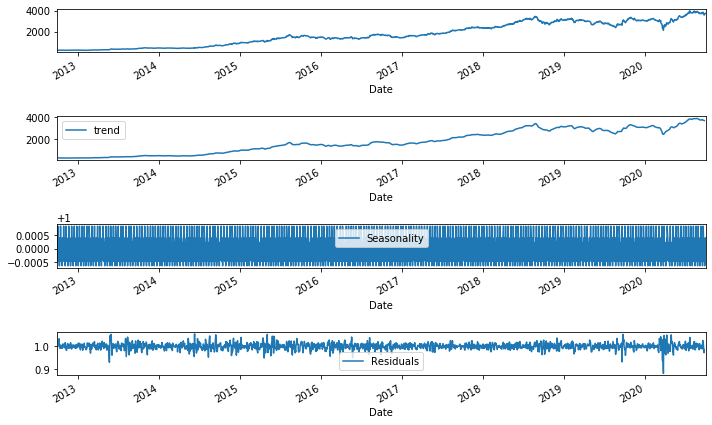

In [22]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1, model='multiplicative', freq=8)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

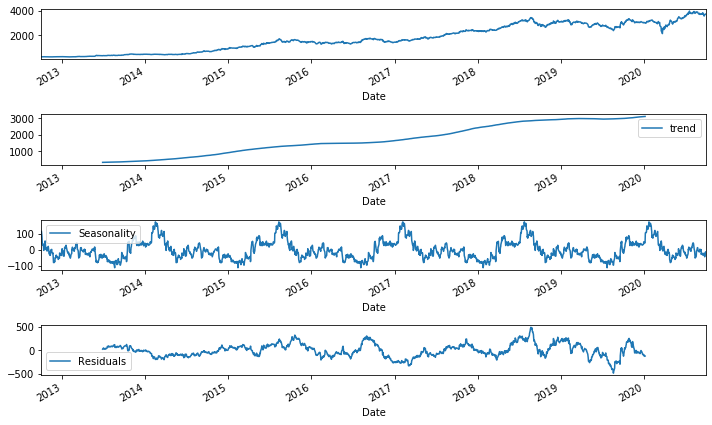

In [23]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Holt Winters Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [25]:
model_hwes = HWES(train, seasonal_periods=365, trend='add', seasonal='mul')
fitted = model_hwes.fit()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [26]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1576
Model:             ExponentialSmoothing   SSE                        1415813.159
Optimized:                         True   AIC                          11455.697
Trend:                         Additive   BIC                          13434.513
Seasonal:                Multiplicative   AICC                         11684.953
Seasonal Periods:                   365   Date:                 Wed, 30 Sep 2020
Box-Cox:                          False   Time:                         23:19:18
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.7368421                alpha                 True
smoothing_slope       

In [31]:
hwes = fitted.forecast(394)
#print(hwes1)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [32]:
hwes

1576    2917.240546
1577    2899.739236
1578    2906.571495
1579    2876.980541
1580    2843.731484
           ...     
1965   -3793.560255
1966   -3819.001085
1967   -3815.637354
1968   -3869.131472
1969   -3960.724811
Length: 394, dtype: float64

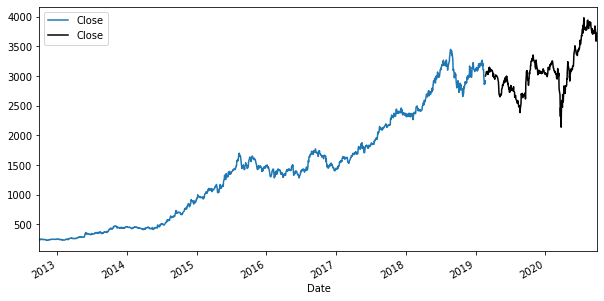

In [33]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
print(mean_squared_error(y_true=test,y_pred=hwes))

16491892.338621372


In [36]:
np.sqrt((mean_squared_error(y_true=test,y_pred=hwes)))

4061.021095564682

# testing stationarity

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

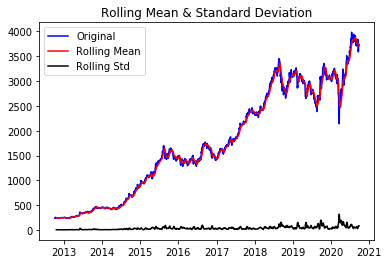

Results of Dickey-Fuller Test:
Test Statistic                   -0.210487
p-value                           0.937260
#Lags Used                       14.000000
Number of Observations Used    1955.000000
Critical Value (1%)              -3.433699
Critical Value (5%)              -2.863020
Critical Value (10%)             -2.567558
dtype: float64


In [38]:
test_stationarity(time1)

In [39]:
#series is not stationary as mean is increasing even though the std.
#pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [40]:
diff1=train.diff(2)
diff1=diff1.dropna()

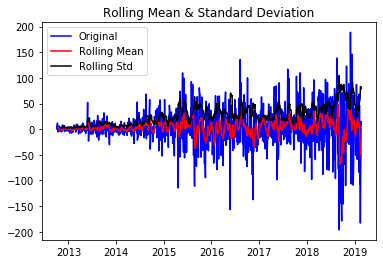

Results of Dickey-Fuller Test:
Test Statistic                -7.851841e+00
p-value                        5.574290e-12
#Lags Used                     1.900000e+01
Number of Observations Used    1.554000e+03
Critical Value (1%)           -3.434565e+00
Critical Value (5%)           -2.863402e+00
Critical Value (10%)          -2.567761e+00
dtype: float64


In [41]:
test_stationarity(diff1)

In [42]:
#pvalue< 0.05 hence H0 rejected that the series is stationary

# ARIMA

In [43]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

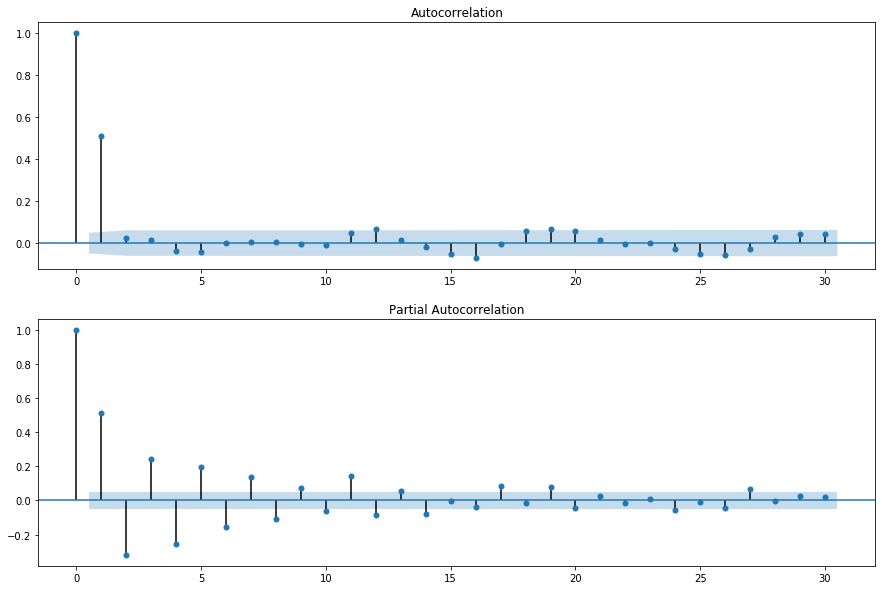

In [44]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=30)
pyplot.show()

In [47]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(2,2,2))
model_fit=model.fit(disp=True)
print(model_fit.summary())

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1574
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -7272.870
Method:                       css-mle   S.D. of innovations             24.517
Date:                Wed, 30 Sep 2020   AIC                          14557.739
Time:                        23:21:49   BIC                          14589.908
Sample:                             2   HQIC                         14569.694
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.001      0.620      0.535      -0.002       0.004
ar.L1.D2.Close    -0.9239      0.067    -13.864      0.000      -1.055      -0.793
ar.L2.D2.Close     0.0249      0.026

In [48]:
arima_mod=model_fit.forecast(394)[0]

In [49]:
print(mean_absolute_error(y_true=test,y_pred=arima_mod))

328.22657873684824


In [50]:
np.sqrt(mean_squared_error(y_true=test, y_pred=arima_mod))

413.1762667797286

# SARIMAX

In [51]:
import statsmodels.api as sm

In [52]:
diffs1=diff1.diff(2)
diffs1=diffs1.dropna()

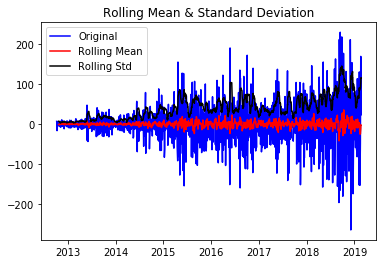

Results of Dickey-Fuller Test:
Test Statistic                -1.245391e+01
p-value                        3.525486e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.548000e+03
Critical Value (1%)           -3.434581e+00
Critical Value (5%)           -2.863409e+00
Critical Value (10%)          -2.567765e+00
dtype: float64


In [53]:
test_stationarity(diffs1)

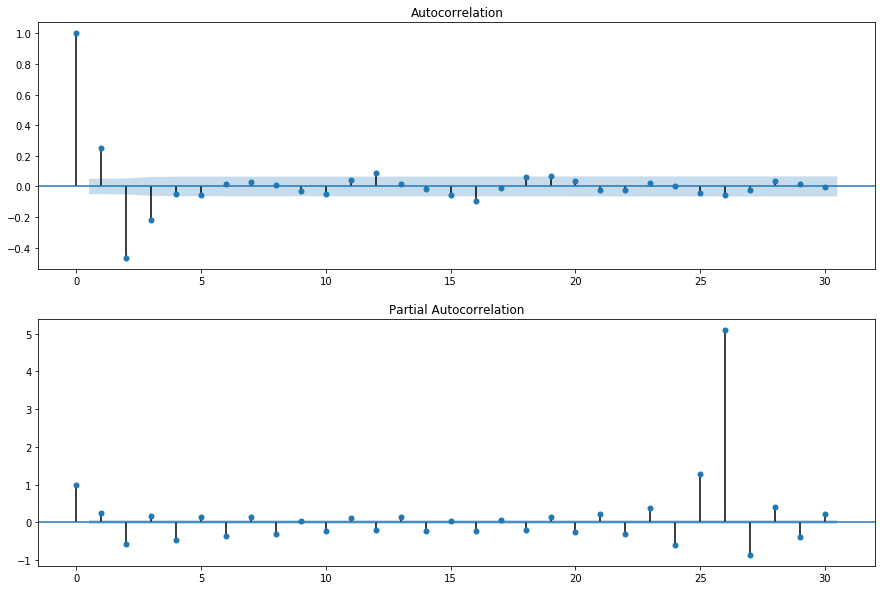

In [54]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=30)
pyplot.show()

In [55]:
train.shape

(1576,)

In [56]:
model = sm.tsa.SARIMAX(train, order=(2,1,2), seasonal_order=(2,1,2,7))

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [57]:
model_fit=model.fit(disp=True)
print(model_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 1576
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood               -7256.826
Date:                           Wed, 30 Sep 2020   AIC                          14531.651
Time:                                   23:22:57   BIC                          14579.869
Sample:                                        0   HQIC                         14549.574
                                          - 1576                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0381      3.248      0.012      0.991      -6.328       6.405
ar.L2          0.2790      0.942      0.296

In [58]:
forecast = model_fit.forecast(steps=394)


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [59]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

257.99049140365656


In [60]:
np.sqrt(mean_squared_error(y_true=test, y_pred=forecast))

326.7778302299214

## The best model is SARIMAX model as the RMSE value is low in this model as compared to other models.

#### This is done by Sudhanshu 